In [1]:
#PCA Principal components 

In [2]:
###take two, here it starts
################################
######### xxxxxxx ##############
################################


## import packages, 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn import datasets
#from sklearn.tree import DecisionTreeClassifier 
import datetime
import datetime as dt


# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.decomposition import PCA
import seaborn as sns
import seaborn as sns

import numpy as np
import PIL
from PIL import Image
#import os
from PyPDF2 import PdfFileMerger

import pandas as pd 
import os
from datetime import date

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import table

from codetiming import Timer


In [3]:
timeclock = Timer(name="class")
timeclock.start()
# Do something

In [4]:
#Country	Year	Control	Gov	Pol	Reg	Rule	Voice
#principle component analysis of multivariate time series



#Frist group 
#1. PCA Considering all countries 1 point in time, same month (1m, 3m ,6m,1y)
#2. PCA of each country time series and each governace indicatro time seroes (15y,10y,5y,3y)
#3. PCA all countries all governance time series (15y,10,5,,3y,1y)

#each one PC1, PC1-4, PC1-6,

#APART RULE OF ALW A DN GOVERMENT EFFECTIVENES. 
#1. PCA Considering all countries 1 point in time, same month (1m, 3m ,6m,1y)
#3. PCA all countries all governance time series (15y,10,5,,3y,1y,6m)


#X VARIABLE pca CONSIDERING PCA OF THE LAST EYAR
#X2 CONSIEINRG pca OFTHJEALST 3 YEARAS

######update
#1. PCA Considering all countries 1 point in time, same month (1m, 3m ,6m,1y)
##pc1, pc2, pc3, aver

#average of all governance indicators
#summ all pricinpall componeentes


#PCA by individul a country
#PCa by all countries in the sdame point in time

#firs , specific yeear

#####################################################################################

#pca with the last 4 years of govbernance idnicators

#Modela 100 consider only one month
#Modesl 200 consider 3 months
#Modes 300 consider 6 months
#Modesl 400 considers 12 months


#Principal Component Analysis (PCA) is one of the most popular dimensionality reduction methods which transforms
#the data by projecting it to a set of orthogonal axes. It works by finding the eigenvectors and eigenvalues 
#of the covariance matrix of the dataset. The Eigenvectors are called as the “Principal Components” of the dataset.

#Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data


#The first principal component explains most of the variance in the data.
#In a nutshell, Principal Component Analysis (PCA) decomposes the data into many 
#vectors called principal components that essentially “summarise” the given data. 
#More specifically, these summaries are linear combinations of the input features that 
#try to explain as much variance in the data as possible. By convention, 
#these principal components are ordered by the amount of variance they can explain, 
#with the first principal component explaining most of the data.

In [5]:
cds_tmp = pd.read_csv (r'K:\2020_2431\q\sandbox\cds_tmp.csv')
cds_tmp['datetime'] = pd.to_datetime(cds_tmp.Date)
cds_tmp['year'], cds_tmp['month'] = cds_tmp['datetime'].dt.year, cds_tmp['datetime'].dt.month
cds_tmp['month'] = cds_tmp['month'].astype (str)
cds_tmp['month'] = cds_tmp['month'].apply(lambda x: x.zfill(2))
cds_tmp['year_month'] = cds_tmp['year'].map(str) +  cds_tmp['month'].map(str)
print(cds_tmp)



year_month=cds_tmp['year_month'].unique()
print(year_month)


name_cds = [['argentina', 'CDSI.AR.5Y.LAST_PRICE'], 
            ['philippines', 'CDSI.PH.5Y.LAST_PRICE'],
            ['czech republic','CDSI.CZ.5Y.LAST_PRICE'],
            ['thailand','CDSI.TH.5Y.LAST_PRICE'],
            ['turkey','CDSI.TR.5Y.LAST_PRICE'],
            ['indonesia','CDSI.ID.5Y.LAST_PRICE'],
            ['poland','CDSI.PL.5Y.LAST_PRICE'],
            ['malaysia','CDSI.MY.5Y.LAST_PRICE'],
            ['korea','CDSI.KR.5Y.LAST_PRICE'],
            ['mexico','CDSI.MX.5Y.LAST_PRICE'],
            ['south africa','CDSI.ZA.5Y.LAST_PRICE'],
            ['israel','CDSI.IL.5Y.LAST_PRICE'],
            ['hungary','CDSI.HU.5Y.LAST_PRICE'],
            ['colombia','CDSI.CO.5Y.LAST_PRICE'],
            ['chile','CDSI.CL.5Y.LAST_PRICE'],
            ['brazil','CDSI.BR.5Y.LAST_PRICE'],
            ['china','CDSI.CN.5Y.LAST_PRICE'],
            ['russia','CDSI.RU.5Y.LAST_PRICE'],
            ['peru','CDSI.PE.5Y.LAST_PRICE']]
name_cds = pd.DataFrame(name_cds, columns = ['country', 'ticker'])

country=name_cds['country'].unique()
print(country)
#create all combinations, and then sort
lp1, lp2 = pd.core.reshape.util.cartesian_product([year_month, country])
cds0=pd.DataFrame(dict(year_month=lp1, country=lp2))
print(cds0)

cds_tmp1=cds_tmp[['year_month','datetime']]
cds_tmp1=cds_tmp1[cds_tmp.groupby('year_month').datetime.transform('max') == cds_tmp1['datetime']]
cds_tmp1=cds_tmp1.reset_index(drop=True)
print(cds_tmp1)

cds0=pd.merge(cds0, cds_tmp1,  how='left', left_on=['year_month'], right_on = ['year_month']) 
print(cds0)


#cds_tmp.drop('year', axis=1, inplace=True)
cds_tmp.drop('month', axis=1, inplace=True)
cds_tmp.drop('year_month', axis=1, inplace=True)
cds_tmp.drop('Date', axis=1, inplace=True)

cds1=pd.merge(cds0, cds_tmp,  how='left', left_on=['datetime'], right_on = ['datetime']) 
print(cds1)

cds1.loc[cds1['country'] == 'argentina', 'cds'] = cds1['CDSI.AR.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'philippines', 'cds'] = cds1['CDSI.PH.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'czech republic', 'cds'] = cds1['CDSI.CZ.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'thailand', 'cds'] = cds1['CDSI.TH.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'turkey', 'cds'] = cds1['CDSI.TR.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'indonesia', 'cds'] = cds1['CDSI.ID.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'poland', 'cds'] = cds1['CDSI.PL.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'malaysia', 'cds'] = cds1['CDSI.MY.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'korea', 'cds'] = cds1['CDSI.KR.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'mexico', 'cds'] = cds1['CDSI.MX.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'south africa', 'cds'] = cds1['CDSI.ZA.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'israel', 'cds'] = cds1['CDSI.IL.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'hungary', 'cds'] = cds1['CDSI.HU.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'colombia', 'cds'] = cds1['CDSI.CO.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'chile', 'cds'] = cds1['CDSI.CL.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'brazil', 'cds'] = cds1['CDSI.BR.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'china', 'cds'] = cds1['CDSI.CN.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'russia', 'cds'] = cds1['CDSI.RU.5Y.LAST_PRICE']
cds1.loc[cds1['country'] == 'peru', 'cds'] = cds1['CDSI.PE.5Y.LAST_PRICE']


#cds1.loc[cds1['A'] > df['B'], 'C'] = 1
#cds1.loc[cds1['A'] < df['B'], 'C'] = -1

cds1=cds1[['year_month','year','country','datetime','cds']]
#####################
cds1['cds'] = cds1['cds'].multiply(10000)
#####mround to 
cds1['cds'] = cds1['cds'].round(1)



print(cds1)

            Date  CDSI.AR.5Y.LAST_PRICE  CDSI.PH.5Y.LAST_PRICE  \
0     2010-01-04               0.089000               0.016600   
1     2010-01-05               0.090000               0.016400   
2     2010-01-06               0.092500               0.016400   
3     2010-01-07               0.095000               0.016400   
4     2010-01-08               0.096500               0.016400   
...          ...                    ...                    ...   
2991  2021-10-07               0.206583               0.005909   
2992  2021-10-08               0.210391               0.006158   
2993  2021-10-11               0.210815               0.006778   
2994  2021-10-12               0.214920               0.006580   
2995  2021-10-13               0.216752               0.006728   

      CDSI.CZ.5Y.LAST_PRICE  CDSI.TH.5Y.LAST_PRICE  CDSI.TR.5Y.LAST_PRICE  \
0                  0.009500               0.010100               0.018300   
1                  0.008800               0.009800   

In [6]:
#Frist erxtract the time series of CDS y depoendant variable from decison tree analisis. 
#base = pd.read_csv (r'K:\2020_2431\cds\decision_tree\cds_data3.csv')
#print(base3)
#base_pca002=base_pca001
#print(base)
#tIME COUNTRY AND CDS
#filter country with nas
#base = base[base.country != 'Russia']
#base=base.reset_index(drop=True)
#base_pca001 = base_pca001[['a', 'b']]
#base = base[['time','country','cds']]
#print(base)
#base_output=base
#base_country=base.country
#y = base_pca002.cds # Target variable
#base_dpt=y
#print(y2)
#base_pca002['year'] = int(str(base_pca002['time'])[:4])
#base_pca002['year'] = base_pca002.index.astype('time').str[:2]
#base_pca002["time"] = base_pca002.to_numeric(base_pca002["time"])
#base["cds"] = (base["cds"]+0)


base=cds1
#base["time"] = (base["time"]+0)
#base['time'] = base['time'].astype(str)

#base_pca002["cds"] = base_pca002.to_numeric(base_pca002["cds"], errors='coerce')
#base_pca002['time'].series.str.replace(',', '')
#base['year'] = base['time'].str[:4]
#base['year'] =(base['year'].astype(int))
base['month'] = base['year_month'].str[5:6]
base['month'] =(base['month'].astype(int))

#base['country'] = base['country'].astype(str)
#base['country'] = base['country'].str.lower()



def year_adj(s):
    if (s['month'] <= 11 ):
        return -2
    else:
        return -1

base['y_adj'] = base.apply(year_adj, axis=1)
base['year_adj'] = (base["year"]+base["y_adj"])


print(base)

     year_month  year         country   datetime     cds  month  y_adj  \
0        201001  2010       argentina 2010-01-29  1015.0      1     -2   
1        201001  2010     philippines 2010-01-29   189.0      1     -2   
2        201001  2010  czech republic 2010-01-29    96.0      1     -2   
3        201001  2010        thailand 2010-01-29   112.0      1     -2   
4        201001  2010          turkey 2010-01-29   194.0      1     -2   
...         ...   ...             ...        ...     ...    ...    ...   
2693     202110  2021           chile 2021-10-13    89.6      0     -2   
2694     202110  2021          brazil 2021-10-13   207.0      0     -2   
2695     202110  2021           china 2021-10-13    55.8      0     -2   
2696     202110  2021          russia 2021-10-13    88.1      0     -2   
2697     202110  2021            peru 2021-10-13    92.1      0     -2   

      year_adj  
0         2008  
1         2008  
2         2008  
3         2008  
4         2008  
...      

# governance indicators

In [7]:
#gov = pd.read_csv (r'K:\2020_2431\cds\Institutional\governance.csv')
#K:\2020_2431\q\sandbox
gov = pd.read_csv (r'K:\2020_2431\q\sandbox\gov1.csv')

#K:\2020_2431\cds\Institutional
gov['country'] = gov['country'].astype(str)
gov['country'] = gov['country'].str.lower()
#gov['indicator'] = gov['indicator'].astype(str)
#gov['indicator'] = gov['indicator'].str.lower()
#gov['date'] = gov['date'].astype(str)
#gov['year'] = gov['date'].str[5:6]
#gov['date'] = pd.to_datetime(gov['date'])
#gov['year'], gov['month'] = gov['date'].pd.year, gov['date'].pd.month
#year, country corrputoip, effect, regf, rule, stability voice. 

gov.rename(columns={'effectiv':'effect'}, inplace=True)
gov.rename(columns={'regulatory':'reg'}, inplace=True)
gov=gov[['year','country','corruption','effect','reg','rule','stability','voice']]
print(gov)

     year      country  corruption  effect   reg  rule  stability  voice
0    2010        india       -0.47    0.03 -0.38 -0.04      -1.28  0.443
1    2011        india       -0.54    0.01 -0.34 -0.09      -1.33  0.436
2    2012        india       -0.51   -0.17 -0.47 -0.07      -1.29  0.399
3    2013        india       -0.52   -0.17 -0.47 -0.06      -1.23  0.433
4    2014        india       -0.43   -0.21 -0.45 -0.06      -1.00  0.413
..    ...          ...         ...     ...   ...   ...        ...    ...
195  2015  philippines       -0.45    0.11 -0.04 -0.34      -0.86  0.147
196  2016  philippines       -0.49   -0.01  0.00 -0.35      -1.38  0.163
197  2017  philippines       -0.48   -0.05  0.02 -0.41      -1.18  0.084
198  2018  philippines       -0.54    0.05 -0.06 -0.48      -1.08  0.039
199  2019  philippines       -0.57    0.05  0.01 -0.48      -0.88  0.030

[200 rows x 8 columns]


# scatterplot evolution

K:\2020_2431\q\cds_report\images\pca\report_c
philippines


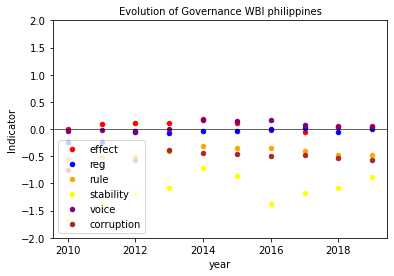

czech republic


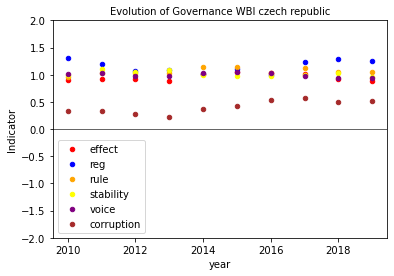

thailand


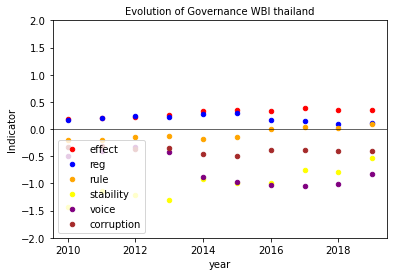

indonesia


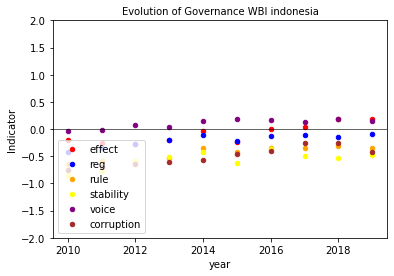

poland


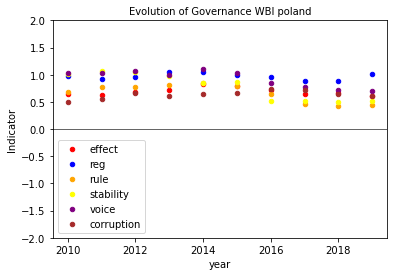

malaysia


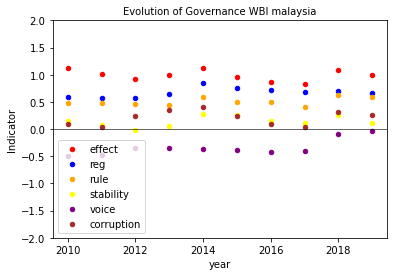

korea


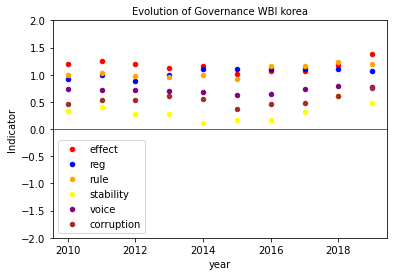

mexico


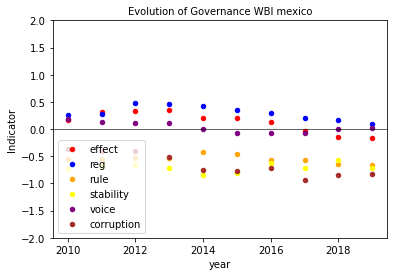

south africa


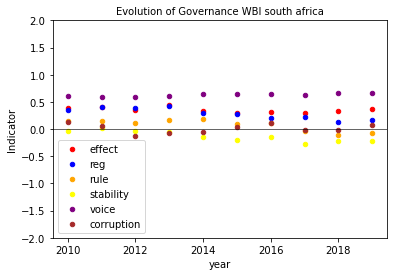

israel


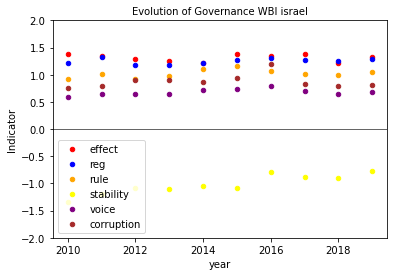

hungary


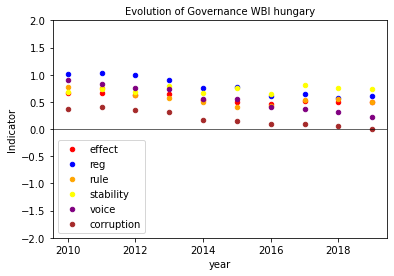

colombia


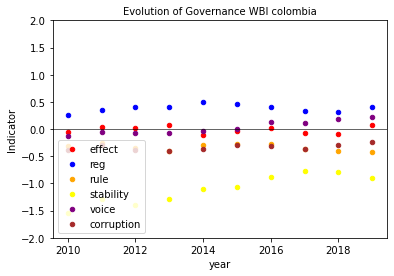

chile


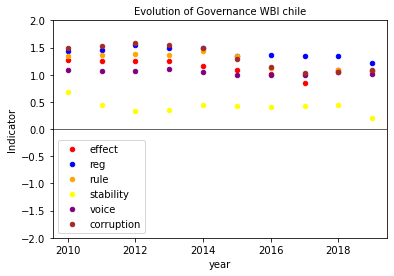

brazil


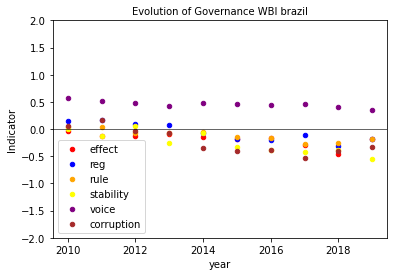

china


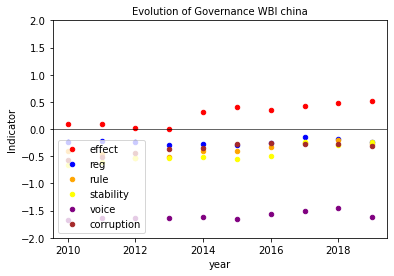

russia 


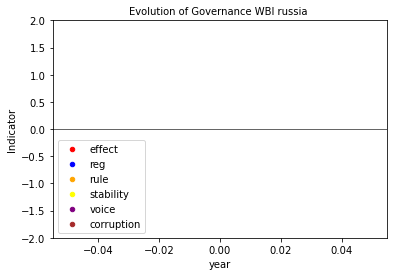

peru


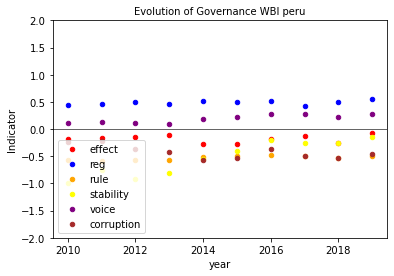

turkey


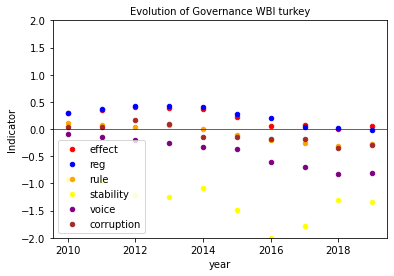

In [8]:
##################################
#*****
os.chdir('K:/2020_2431/q/cds_report/images/pca/report_c')
print(os.getcwd())

# year      country  corruption  effect   reg  rule  stability  voice

lst =['philippines','czech republic','thailand','indonesia','poland','malaysia','korea','mexico','south africa',
      'israel','hungary','colombia','chile','brazil','china','russia ','peru','turkey']

for x in range(len(lst)): 

    country_name1=str(lst[x])
    print(country_name1)
    specific_gov =gov[gov.country == str(country_name1)]
    ax = plt.gca()
    specific_gov.plot(kind='scatter',x='year',y='effect',label = 'effect',color='red', legend=True,ax=ax)
    specific_gov.plot(kind='scatter',x='year',y='reg',label = 'reg', color='blue', legend=True, ax=ax)
    specific_gov.plot(kind='scatter',x='year',y='rule',label = 'rule', color='orange', legend=True, ax=ax)
    specific_gov.plot(kind='scatter',x='year',y='stability',label = 'stability', color='yellow', legend=True, ax=ax)
    specific_gov.plot(kind='scatter',x='year',y='voice',label = 'voice', color='purple', legend=True, ax=ax)
    specific_gov.plot(kind='scatter',x='year',y='corruption',label = 'corruption', color='brown', legend=True, ax=ax)
    plt.legend(loc='lower left')
    plt.ylabel(str("Indicator"), size=10)
    plt.xlabel(str("year"), size=10)
    plt.title(str("Evolution of Governance WBI "+country_name1), size=10)
    plt.axhline(0, color='black', lw=1, alpha=0.6)
    plt.axis([None, None, -2, 2])
    plt.savefig(str(country_name1+".jpg"), bbox_inches='tight')
    plt.show()
    del ax
    del specific_gov

In [9]:

final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\pca\\report\\")
final_location_last = '.pdf'

os.chdir('K:/2020_2431/q/cds_report/images/pca/report_c')
print(os.getcwd())


lst =['philippines','czech republic','thailand','indonesia','poland','malaysia','korea','mexico','south africa',
      'israel','hungary','colombia','chile','brazil','china','russia ','peru']


list_im = [str("brazil.jpg"),str("mexico.jpg"),str("peru.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f1.jpg") ) 

    
list_im = [str("colombia.jpg"),str("chile.jpg"),str("israel.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f2.jpg") ) 


list_im = [str("south africa.jpg"),str("turkey.jpg"),str("turkey.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f3.jpg") ) 


list_im = [str("f1.jpg"),str("f2.jpg"),str("f3.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"002_group1.pdf") ) 


del list_im
del imgs
del imgs_comb


#######
lst =['philippines','czech republic','thailand','indonesia','poland','malaysia','korea','mexico','south africa',
      'israel','hungary','colombia','chile','brazil','china','russia ','peru']



list_im = [str("czech republic.jpg"),str("poland.jpg"),str("hungary.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f4.jpg") ) 

    
list_im = [str("china.jpg"),str("korea.jpg"),str("thailand.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f5.jpg") ) 


list_im = [str("philippines.jpg"),str("indonesia.jpg"),str("malaysia.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f6.jpg") ) 


list_im = [str("f4.jpg"),str("f5.jpg"),str("f6.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"002_group2.pdf") ) 




K:\2020_2431\q\cds_report\images\pca\report_c


<ipython-input-9-a34856f1f12d>:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-9-a34856f1f12d>:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-9-a34856f1f12d>:34: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-9-a3

In [10]:

#governance1['year'] = governance1['date'].dt.year
#governance1['date'] = pd.to_datetime(governance1['date'])
#governance1['year'] = datetime.datetime.strptime(governance1['date'], '%d/%m/%Y').year
# %Y - year including the century
# %m - month (01 to 12)
# %d - day of the month (01 to 31)
#governance1['year']=pd.to_datetime(governance1['date'], format="%Y/%m/%d")
#governance1['year'] = governance1.year[-4:]
#governance1['year'] = governance1['date'].str.strip().str[-4]
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [11]:
#establish index year
#df.drop_duplicates()
#gov_y=gov['year']
#gov_y=gov_y.drop_duplicates()
#.unique()
#print(gov_y)
#gov_y.sort_values("year")
#gov_y.sort_values('1')
#gov_y = gov_y.sort_values('year', inplace=True)
#gov_y=gov_y.reset_index(drop=True)
#base = base[base.country != 'Russia']




In [12]:
#try different iterations see how varaiblaes are affected
#gov1 = gov[gov.year == 2019]
now = datetime.datetime.now()
now_year=now.year-6

gov1 = gov[gov.year >= now_year]
gov1=gov1.reset_index(drop=True)
#print(gov1)

gov1=gov1.sort_values(['year', 'country'], ascending=[True, True])
gov1=gov1.reset_index(drop=True)
#gov1 = gov1.reset_index(drop=True)
print(gov1)

    year         country  corruption  effect   reg  rule  stability  voice
0   2015          brazil       -0.40   -0.18 -0.19 -0.15      -0.33  0.459
1   2015           chile        1.28    1.09  1.35  1.34       0.43  1.004
2   2015           china       -0.28    0.41 -0.29 -0.41      -0.55 -1.661
3   2015        colombia       -0.30   -0.04  0.47 -0.27      -1.07  0.004
4   2015  czech republic        0.43    1.05  1.10  1.15       0.98  1.043
..   ...             ...         ...     ...   ...   ...        ...    ...
95  2019          russia       -0.83    0.15 -0.43 -0.72      -0.54 -1.100
96  2019    south africa        0.08    0.37  0.16 -0.08      -0.22  0.670
97  2019          taiwan        1.05    1.44  1.40  1.14       0.72  0.996
98  2019        thailand       -0.41    0.36  0.12  0.10      -0.54 -0.827
99  2019          turkey       -0.29    0.05 -0.01 -0.28      -1.34 -0.815

[100 rows x 8 columns]


In [13]:
print(gov1)

    year         country  corruption  effect   reg  rule  stability  voice
0   2015          brazil       -0.40   -0.18 -0.19 -0.15      -0.33  0.459
1   2015           chile        1.28    1.09  1.35  1.34       0.43  1.004
2   2015           china       -0.28    0.41 -0.29 -0.41      -0.55 -1.661
3   2015        colombia       -0.30   -0.04  0.47 -0.27      -1.07  0.004
4   2015  czech republic        0.43    1.05  1.10  1.15       0.98  1.043
..   ...             ...         ...     ...   ...   ...        ...    ...
95  2019          russia       -0.83    0.15 -0.43 -0.72      -0.54 -1.100
96  2019    south africa        0.08    0.37  0.16 -0.08      -0.22  0.670
97  2019          taiwan        1.05    1.44  1.40  1.14       0.72  0.996
98  2019        thailand       -0.41    0.36  0.12  0.10      -0.54 -0.827
99  2019          turkey       -0.29    0.05 -0.01 -0.28      -1.34 -0.815

[100 rows x 8 columns]


In [14]:

#from sklearn.preprocessing import StandardScaler
features = ['corruption','effect','reg','rule','stability','voice']
# Separating out the features
x = gov1.loc[:, features].values

# Separating out the target
#y = df.loc[:,['target']].values
#Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)


[[-6.92960511e-01 -1.19991767e+00 -1.07943688e+00 -4.96786406e-01
  -9.70995406e-02  4.21473510e-01]
 [ 2.19151337e+00  1.25402024e+00  1.56716843e+00  1.81999527e+00
   9.66238368e-01  1.17809614e+00]
 [-4.86926662e-01 -5.98992719e-02 -1.25129437e+00 -9.01057034e-01
  -4.04907883e-01 -2.52171909e+00]
 [-5.21265637e-01 -9.29404832e-01  5.48225385e-02 -6.83372850e-01
  -1.13245487e+00 -2.10202260e-01]
 [ 7.32106942e-01  1.17673086e+00  1.13752471e+00  1.52456673e+00
   1.73575922e+00  1.23223977e+00]
 [ 2.51361295e-01  1.14001840e-01  5.70395001e-01  3.58401461e-01
   1.41395959e+00  5.61691648e-01]
 [-6.07113074e-01 -6.78214337e-01 -1.42315185e+00 -3.41297703e-01
  -9.64559414e-01  3.78436260e-01]
 [-7.95977435e-01 -1.31585175e+00 -1.13099413e+00 -9.16605905e-01
  -5.02846901e-01  4.10797495e-02]
 [ 1.60775080e+00  1.83369061e+00  1.42968244e+00  1.54011560e+00
  -1.16043745e+00  8.18526851e-01]
 [ 6.29090018e-01  1.09944147e+00  1.15471046e+00  1.18249159e+00
   5.88473585e-01  6.6026

In [15]:
#from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2',
                         'principal_component_3', 'principal_component_4',
                         'principal_component_5', 'principal_component_6'])

print(principalDf)

    principal_component_1  principal_component_2  principal_component_3  \
0               -1.388834              -1.133144              -0.036080   
1                3.730777               0.146467               0.375593   
2               -2.194572               1.748236              -1.005280   
3               -1.370675              -0.139444               0.789105   
4                3.024593              -0.479930              -0.645593   
..                    ...                    ...                    ...   
95              -2.869516               0.648966              -0.937802   
96              -0.116036              -0.708071               0.184889   
97               3.876326               0.244871              -0.082754   
98              -1.269730               0.944275              -0.441664   
99              -2.178494               0.907237               0.535256   

    principal_component_4  principal_component_5  principal_component_6  
0                0.493492

In [16]:
#finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
#concatenate
#finalDf = pd.concat([principalDf, gov1[['target']]], axis = 1)
#finalDf = pd.concat([principalDf,gov1], axis = 1)
finalDf = pd.concat([gov1,principalDf], axis = 1)
#finalDf.to_clipboard()
print(finalDf)

    year         country  corruption  effect   reg  rule  stability  voice  \
0   2015          brazil       -0.40   -0.18 -0.19 -0.15      -0.33  0.459   
1   2015           chile        1.28    1.09  1.35  1.34       0.43  1.004   
2   2015           china       -0.28    0.41 -0.29 -0.41      -0.55 -1.661   
3   2015        colombia       -0.30   -0.04  0.47 -0.27      -1.07  0.004   
4   2015  czech republic        0.43    1.05  1.10  1.15       0.98  1.043   
..   ...             ...         ...     ...   ...   ...        ...    ...   
95  2019          russia       -0.83    0.15 -0.43 -0.72      -0.54 -1.100   
96  2019    south africa        0.08    0.37  0.16 -0.08      -0.22  0.670   
97  2019          taiwan        1.05    1.44  1.40  1.14       0.72  0.996   
98  2019        thailand       -0.41    0.36  0.12  0.10      -0.54 -0.827   
99  2019          turkey       -0.29    0.05 -0.01 -0.28      -1.34 -0.815   

    principal_component_1  principal_component_2  principal_com

In [17]:
#create different iterations
finalDf['pc_1'] = (finalDf["principal_component_1"])
finalDf['pc_1+2'] = (finalDf["principal_component_1"]+finalDf["principal_component_2"])
finalDf['pc_1+2+3'] = (finalDf["principal_component_1"]+finalDf["principal_component_2"]
                       +finalDf["principal_component_3"])
finalDf['pc_1+2+3+4'] = (finalDf["principal_component_1"]+finalDf["principal_component_2"]
                         +finalDf["principal_component_3"]+finalDf["principal_component_4"])
finalDf['pc_1+2+3+4+5'] = (finalDf["principal_component_1"]+finalDf["principal_component_2"]
                         +finalDf["principal_component_3"]+finalDf["principal_component_4"]
                         +finalDf["principal_component_5"])
finalDf['pc_1+2+3+4+5+6'] = (finalDf["principal_component_1"]+finalDf["principal_component_2"]
                         +finalDf["principal_component_3"]+finalDf["principal_component_4"]
                         +finalDf["principal_component_5"]+finalDf["principal_component_6"])

#average
finalDf['avg_wgi']= ((finalDf["corruption"]+finalDf["effect"]
                         +finalDf["reg"]+finalDf["rule"]
                         +finalDf["stability"]+finalDf["voice"])/6)
#median

#year adjusted
finalDf['year_adj']= finalDf["year"]
finalDf= finalDf[["year_adj","country","pc_1","pc_1+2","pc_1+2+3","pc_1+2+3+4","pc_1+2+3+4+5","pc_1+2+3+4+5+6","avg_wgi"]]   
print(finalDf)
#finalDf[["corruption", "effect","reg","rule","stability","voice"]].mean()


    year_adj         country      pc_1    pc_1+2  pc_1+2+3  pc_1+2+3+4  \
0       2015          brazil -1.388834 -2.521978 -2.558058   -2.064566   
1       2015           chile  3.730777  3.877244  4.252837    4.436661   
2       2015           china -2.194572 -0.446336 -1.451616   -1.176578   
3       2015        colombia -1.370675 -1.510119 -0.721015   -1.313618   
4       2015  czech republic  3.024593  2.544664  1.899071    1.952815   
..       ...             ...       ...       ...       ...         ...   
95      2019          russia -2.869516 -2.220551 -3.158352   -3.035933   
96      2019    south africa -0.116036 -0.824108 -0.639219   -0.186186   
97      2019          taiwan  3.876326  4.121196  4.038443    4.049528   
98      2019        thailand -1.269730 -0.325455 -0.767120   -0.784993   
99      2019          turkey -2.178494 -1.271256 -0.736001   -0.767680   

    pc_1+2+3+4+5  pc_1+2+3+4+5+6   avg_wgi  
0      -2.072957       -1.825443 -0.131833  
1       4.979475     

In [18]:




#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
#https://www.portfolioconstructs.com/blog-detail/25?title=PCA%20for%20Stock%20Market%20Analysis%20with%20scikit-learn
#https://stackabuse.com/implementing-pca-in-python-with-scikit-learn
#https://www.machinecurve.com/index.php/2020/12/07/introducing-pca-with-python-and-scikit-learn-for-machine-learning/    
#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html



In [19]:
#concatenate the CDS to the principal componeet data    
print(base)
new_df = pd.merge(base, finalDf,  how='left', left_on=['country','year_adj'], right_on = ['country','year_adj'])
#filter 
new_df = new_df[new_df.year_adj>= 2010]
new_df = new_df[new_df.country != 'argentina']
new_df = new_df[new_df.country != 'turkey']
new_df=new_df.reset_index(drop=True)
print(new_df)

     year_month  year         country   datetime     cds  month  y_adj  \
0        201001  2010       argentina 2010-01-29  1015.0      1     -2   
1        201001  2010     philippines 2010-01-29   189.0      1     -2   
2        201001  2010  czech republic 2010-01-29    96.0      1     -2   
3        201001  2010        thailand 2010-01-29   112.0      1     -2   
4        201001  2010          turkey 2010-01-29   194.0      1     -2   
...         ...   ...             ...        ...     ...    ...    ...   
2693     202110  2021           chile 2021-10-13    89.6      0     -2   
2694     202110  2021          brazil 2021-10-13   207.0      0     -2   
2695     202110  2021           china 2021-10-13    55.8      0     -2   
2696     202110  2021          russia 2021-10-13    88.1      0     -2   
2697     202110  2021            peru 2021-10-13    92.1      0     -2   

      year_adj  
0         2008  
1         2008  
2         2008  
3         2008  
4         2008  
...      

In [20]:
# dynamic time series filter
print(cds_tmp1)
cds_tmp2=cds_tmp1
cds_tmp2 = cds_tmp2.sort_values(by='datetime',ascending=False)
cds_tmp2 = cds_tmp2.reset_index()
cds_tmp2 = cds_tmp2.rename(columns={"index":"sequence"})
cds_tmp2['sequence'] = cds_tmp2.index + 1
print(cds_tmp2)
cds_tmp2['sequence'] = cds_tmp2.index + 1
cds_tmp2.loc[(cds_tmp2['sequence'] == 1) , 'd_1m'] = 1 
cds_tmp2.loc[(cds_tmp2['sequence'] >= 2) , 'd_1m'] = 0  
cds_tmp2.loc[(cds_tmp2['sequence'] <= 4) , 'd_3m'] = 1  
cds_tmp2.loc[(cds_tmp2['sequence'] > 4) , 'd_3m'] = 0  
cds_tmp2.loc[(cds_tmp2['sequence'] <= 7) , 'd_6m'] = 1  
cds_tmp2.loc[(cds_tmp2['sequence'] > 7) , 'd_6m'] = 0  
cds_tmp2.loc[(cds_tmp2['sequence'] <= 13) , 'd_12m'] = 1  
cds_tmp2.loc[(cds_tmp2['sequence'] > 13) , 'd_12m'] = 0 
print(cds_tmp2)

filter_1m=cds_tmp2[cds_tmp2.d_1m == 1]
filter_1m=filter_1m['year_month'].tolist()
print(filter_1m)

filter_3m=cds_tmp2[cds_tmp2.d_3m == 1]
filter_3m=filter_3m['year_month'].tolist()
print(filter_3m)

filter_6m=cds_tmp2[cds_tmp2.d_6m == 1]
filter_6m=filter_6m['year_month'].tolist()
print(filter_6m)

filter_12m=cds_tmp2[cds_tmp2.d_12m == 1]
filter_12m=filter_12m['year_month'].tolist()
print(filter_12m)

    year_month   datetime
0       201001 2010-01-29
1       201002 2010-02-26
2       201003 2010-03-31
3       201004 2010-04-30
4       201005 2010-05-28
..         ...        ...
137     202106 2021-06-30
138     202107 2021-07-30
139     202108 2021-08-31
140     202109 2021-09-30
141     202110 2021-10-13

[142 rows x 2 columns]
     sequence year_month   datetime
0           1     202110 2021-10-13
1           2     202109 2021-09-30
2           3     202108 2021-08-31
3           4     202107 2021-07-30
4           5     202106 2021-06-30
..        ...        ...        ...
137       138     201005 2010-05-28
138       139     201004 2010-04-30
139       140     201003 2010-03-31
140       141     201002 2010-02-26
141       142     201001 2010-01-29

[142 rows x 3 columns]
     sequence year_month   datetime  d_1m  d_3m  d_6m  d_12m
0           1     202110 2021-10-13   1.0   1.0   1.0    1.0
1           2     202109 2021-09-30   0.0   1.0   1.0    1.0
2           3     202108 

In [21]:
#different models
#1m,3m,6m,1y
# pc_1    pc_1+2  pc_1+2+3  pc_1+2+3+4  pc_1+2+3+4+5  pc_1+2+3+4+5+6   avg_wgi
#m0101= new_df[new_df.time == "202104"]

#Modela 100 consider only one moint
#Modesl 200 cnsdiers 3 monhts
#Modes 300 cosnider 6 monts
#Modesl 400 considers 12 monts

m0100=new_df[new_df['year_month'].isin(filter_1m)]
m0200=new_df[new_df['year_month'].isin(filter_3m)]
m0300=new_df[new_df['year_month'].isin(filter_6m)]
m0400=new_df[new_df['year_month'].isin(filter_12m)]
m0100=m0100.reset_index(drop=True)
m0200=m0200.reset_index(drop=True)
m0300=m0300.reset_index(drop=True)
m0400=m0400.reset_index(drop=True)
print(m0100)
print(m0200)
print(m0300)
print(m0400)
#base = base[base.country != 'Russia']
#m0101= new_df[new_df.time == "202104"]


   year_month  year         country   datetime    cds  month  y_adj  year_adj  \
0      202110  2021     philippines 2021-10-13   67.3      0     -2      2019   
1      202110  2021  czech republic 2021-10-13   29.9      0     -2      2019   
2      202110  2021        thailand 2021-10-13   43.3      0     -2      2019   
3      202110  2021       indonesia 2021-10-13   94.3      0     -2      2019   
4      202110  2021          poland 2021-10-13   35.2      0     -2      2019   
5      202110  2021        malaysia 2021-10-13   65.0      0     -2      2019   
6      202110  2021           korea 2021-10-13   21.9      0     -2      2019   
7      202110  2021          mexico 2021-10-13  102.5      0     -2      2019   
8      202110  2021    south africa 2021-10-13  215.2      0     -2      2019   
9      202110  2021          israel 2021-10-13   43.3      0     -2      2019   
10     202110  2021         hungary 2021-10-13   49.4      0     -2      2019   
11     202110  2021        c

In [22]:

###update
data=m0100

###update
name=['m0101']
Y=data["cds"]
X=data["pc_1"]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     

output = pd.concat([data,p], axis=1).fillna(method="ffill").dropna() 
print(output)


###update
name=['m0102']
Y=data["cds"]
X=data['pc_1+2']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0103']
Y=data["cds"]
X=data['pc_1+2+3']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)


###update
name=['m0104']
Y=data["cds"]
X=data['pc_1+2+3+4']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0105']
Y=data["cds"]
X=data['pc_1+2+3+4+5']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0106']
Y=data["cds"]
X=data['pc_1+2+3+4+5+6']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0107']
Y=data["cds"]
X=data['avg_wgi']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)



#######



#update
output_m0100=output
#output.to_csv (r'K:\2020_2431\q\sandbox\pca_output.csv', index = False, header=True)



[108.92054949  51.53497919 101.57718609 102.99145666  64.49728942
  72.26274184  48.6866814  112.96279373  87.83976239  55.86014852
  75.66598354 100.68563126  48.62705311 104.55925332 108.19454906
 120.62639484  98.40754615]
         m0101
0   108.920549
1    51.534979
2   101.577186
3   102.991457
4    64.497289
5    72.262742
6    48.686681
7   112.962794
8    87.839762
9    55.860149
10   75.665984
11  100.685631
12   48.627053
13  104.559253
14  108.194549
15  120.626395
16   98.407546
   year_month  year         country   datetime    cds  month  y_adj  year_adj  \
0      202110  2021     philippines 2021-10-13   67.3      0     -2      2019   
1      202110  2021  czech republic 2021-10-13   29.9      0     -2      2019   
2      202110  2021        thailand 2021-10-13   43.3      0     -2      2019   
3      202110  2021       indonesia 2021-10-13   94.3      0     -2      2019   
4      202110  2021          poland 2021-10-13   35.2      0     -2      2019   
5      202110  202

16 -0.050667   98.407546  114.530743  107.381252  
         m0104
0   102.279247
1    71.179896
2    91.938202
3    99.068004
4    77.837699
5    70.544102
6    51.306872
7   114.632110
8    86.673286
9    41.417898
10   90.410982
11   96.482407
12   50.488875
13  100.615379
14   95.508007
15  111.729197
16  111.787836
   year_month  year         country   datetime    cds  month  y_adj  year_adj  \
0      202110  2021     philippines 2021-10-13   67.3      0     -2      2019   
1      202110  2021  czech republic 2021-10-13   29.9      0     -2      2019   
2      202110  2021        thailand 2021-10-13   43.3      0     -2      2019   
3      202110  2021       indonesia 2021-10-13   94.3      0     -2      2019   
4      202110  2021          poland 2021-10-13   35.2      0     -2      2019   
5      202110  2021        malaysia 2021-10-13   65.0      0     -2      2019   
6      202110  2021           korea 2021-10-13   21.9      0     -2      2019   
7      202110  2021          me

   year_month  year         country   datetime    cds  month  y_adj  year_adj  \
0      202110  2021     philippines 2021-10-13   67.3      0     -2      2019   
1      202110  2021  czech republic 2021-10-13   29.9      0     -2      2019   
2      202110  2021        thailand 2021-10-13   43.3      0     -2      2019   
3      202110  2021       indonesia 2021-10-13   94.3      0     -2      2019   
4      202110  2021          poland 2021-10-13   35.2      0     -2      2019   
5      202110  2021        malaysia 2021-10-13   65.0      0     -2      2019   
6      202110  2021           korea 2021-10-13   21.9      0     -2      2019   
7      202110  2021          mexico 2021-10-13  102.5      0     -2      2019   
8      202110  2021    south africa 2021-10-13  215.2      0     -2      2019   
9      202110  2021          israel 2021-10-13   43.3      0     -2      2019   
10     202110  2021         hungary 2021-10-13   49.4      0     -2      2019   
11     202110  2021        c

C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistes

In [23]:
data=m0200

###update
name=['m0201']
Y=data["cds"]
X=data["pc_1"]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     

output = pd.concat([data,p], axis=1).fillna(method="ffill").dropna() 
print(output)


###update
name=['m0202']
Y=data["cds"]
X=data['pc_1+2']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0203']
Y=data["cds"]
X=data['pc_1+2+3']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)


###update
name=['m0204']
Y=data["cds"]
X=data['pc_1+2+3+4']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0205']
Y=data["cds"]
X=data['pc_1+2+3+4+5']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0206']
Y=data["cds"]
X=data['pc_1+2+3+4+5+6']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0207']
Y=data["cds"]
X=data['avg_wgi']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

#update
output_m0200=output
#print(output_m0200)
#output.to_csv (r'K:\2020_2431\q\sandbox\pca_output.csv', index = False, header=True)                

[100.46629872  47.9716098   93.74879858  95.0425331   59.82916284
  66.93277804  45.36606793 104.16402888  81.18219376  51.92815179
  70.04596682  92.93322955  45.31152166  96.47670893  99.80217417
 111.1744734   90.84930203 100.46629872  47.9716098   93.74879858
  95.0425331   59.82916284  66.93277804  45.36606793 104.16402888
  81.18219376  51.92815179  70.04596682  92.93322955  45.31152166
  96.47670893  99.80217417 111.1744734   90.84930203 100.46629872
  47.9716098   93.74879858  95.0425331   59.82916284  66.93277804
  45.36606793 104.16402888  81.18219376  51.92815179  70.04596682
  92.93322955  45.31152166  96.47670893  99.80217417 111.1744734
  90.84930203 100.46629872  47.9716098   93.74879858  95.0425331
  59.82916284  66.93277804  45.36606793 104.16402888  81.18219376
  51.92815179  70.04596682  92.93322955  45.31152166  96.47670893
  99.80217417 111.1744734   90.84930203]
         m0201
0   100.466299
1    47.971610
2    93.748799
3    95.042533
4    59.829163
..         ..

[68 rows x 1 columns]
   year_month  year         country   datetime    cds  month  y_adj  year_adj  \
0      202107  2021     philippines 2021-07-30   51.3      7     -2      2019   
1      202107  2021  czech republic 2021-07-30   30.0      7     -2      2019   
2      202107  2021        thailand 2021-07-30   40.3      7     -2      2019   
3      202107  2021       indonesia 2021-07-30   81.2      7     -2      2019   
4      202107  2021          poland 2021-07-30   38.5      7     -2      2019   
..        ...   ...             ...        ...    ...    ...    ...       ...   
63     202110  2021           chile 2021-10-13   89.6      0     -2      2019   
64     202110  2021          brazil 2021-10-13  207.0      0     -2      2019   
65     202110  2021           china 2021-10-13   55.8      0     -2      2019   
66     202110  2021          russia 2021-10-13   88.1      0     -2      2019   
67     202110  2021            peru 2021-10-13   92.1      0     -2      2019   

     

         m0207
0    98.892406
1    48.574170
2    94.536054
3    93.160720
4    60.152717
..         ...
63   48.011842
64   93.784024
65  101.073969
66  109.935724
67   88.485942

[68 rows x 1 columns]
   year_month  year         country   datetime    cds  month  y_adj  year_adj  \
0      202107  2021     philippines 2021-07-30   51.3      7     -2      2019   
1      202107  2021  czech republic 2021-07-30   30.0      7     -2      2019   
2      202107  2021        thailand 2021-07-30   40.3      7     -2      2019   
3      202107  2021       indonesia 2021-07-30   81.2      7     -2      2019   
4      202107  2021          poland 2021-07-30   38.5      7     -2      2019   
..        ...   ...             ...        ...    ...    ...    ...       ...   
63     202110  2021           chile 2021-10-13   89.6      0     -2      2019   
64     202110  2021          brazil 2021-10-13  207.0      0     -2      2019   
65     202110  2021           china 2021-10-13   55.8      0     -2 

In [24]:
###update
data=m0300
###update
name=['m0301']
Y=data["cds"]
X=data["pc_1"]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     

output = pd.concat([data,p], axis=1).fillna(method="ffill").dropna() 
print(output)


###update
name=['m0302']
Y=data["cds"]
X=data['pc_1+2']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0303']
Y=data["cds"]
X=data['pc_1+2+3']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)


###update
name=['m0304']
Y=data["cds"]
X=data['pc_1+2+3+4']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0305']
Y=data["cds"]
X=data['pc_1+2+3+4+5']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0306']
Y=data["cds"]
X=data['pc_1+2+3+4+5+6']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0307']
Y=data["cds"]
X=data['avg_wgi']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

#update
output_m0300=output
#print(output_m0200)
#output.to_csv (r'K:\2020_2431\q\sandbox\pca_output.csv', index = False, header=True)   


[ 98.1286808   45.94693131  91.45122605  92.73724816  57.73379728
  64.79506531  43.356922   101.80436748  78.95953522  49.87988695
  67.88969527  90.64051892  43.3027009   94.16287436  97.46851532
 108.77302025  88.56901443  98.1286808   45.94693131  91.45122605
  92.73724816  57.73379728  64.79506531  43.356922   101.80436748
  78.95953522  49.87988695  67.88969527  90.64051892  43.3027009
  94.16287436  97.46851532 108.77302025  88.56901443  98.1286808
  45.94693131  91.45122605  92.73724816  57.73379728  64.79506531
  43.356922   101.80436748  78.95953522  49.87988695  67.88969527
  90.64051892  43.3027009   94.16287436  97.46851532 108.77302025
  88.56901443  98.1286808   45.94693131  91.45122605  92.73724816
  57.73379728  64.79506531  43.356922   101.80436748  78.95953522
  49.87988695  67.88969527  90.64051892  43.3027009   94.16287436
  97.46851532 108.77302025  88.56901443  98.1286808   45.94693131
  91.45122605  92.73724816  57.73379728  64.79506531  43.356922
 101.80436748 

[119 rows x 18 columns]
          m0304
0     92.966908
1     63.000176
2     83.002477
3     89.872617
4     69.415506
..          ...
114   43.062709
115   91.363637
116   86.442272
117  102.072696
118  102.129200

[119 rows x 1 columns]
    year_month  year         country   datetime    cds  month  y_adj  \
0       202104  2021     philippines 2021-04-30   46.4      4     -2   
1       202104  2021  czech republic 2021-04-30   30.2      4     -2   
2       202104  2021        thailand 2021-04-30   40.9      4     -2   
3       202104  2021       indonesia 2021-04-30   77.3      4     -2   
4       202104  2021          poland 2021-04-30   38.2      4     -2   
..         ...   ...             ...        ...    ...    ...    ...   
114     202110  2021           chile 2021-10-13   89.6      0     -2   
115     202110  2021          brazil 2021-10-13  207.0      0     -2   
116     202110  2021           china 2021-10-13   55.8      0     -2   
117     202110  2021          russia 202

In [25]:
###update
data=m0400
###update
name=['m0401']
Y=data["cds"]
X=data["pc_1"]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     

output = pd.concat([data,p], axis=1).fillna(method="ffill").dropna() 
print(output)


###update
name=['m0402']
Y=data["cds"]
X=data['pc_1+2']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0403']
Y=data["cds"]
X=data['pc_1+2+3']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)


###update
name=['m0404']
Y=data["cds"]
X=data['pc_1+2+3+4']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0405']
Y=data["cds"]
X=data['pc_1+2+3+4+5']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0406']
Y=data["cds"]
X=data['pc_1+2+3+4+5+6']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

###update
name=['m0407']
Y=data["cds"]
X=data['avg_wgi']
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()
p = reg.predict()
p=p.transpose()
#print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)     
output = pd.concat([output,p], axis=1).fillna(method="ffill").dropna() 
print(output)

#update
output_m0400=output
#print(output_m0200)
#output.to_csv (r'K:\2020_2431\q\sandbox\pca_output.csv', index = False, header=True)   


[ 98.08231009  45.74950335  93.2697214   90.69441567  58.23260973
  62.5507042   45.70788717  99.21121903  79.82608162  53.00175459
  66.5119317   91.59271026  41.75110405  96.23336422  94.64812601
 110.35449328  91.39889425  98.08231009  45.74950335  93.2697214
  90.69441567  58.23260973  62.5507042   45.70788717  99.21121903
  79.82608162  53.00175459  66.5119317   91.59271026  41.75110405
  96.23336422  94.64812601 110.35449328  91.39889425  98.08231009
  45.74950335  93.2697214   90.69441567  58.23260973  62.5507042
  45.70788717  99.21121903  79.82608162  53.00175459  66.5119317
  91.59271026  41.75110405  96.23336422  94.64812601 110.35449328
  91.39889425  96.79579223  46.58743729  90.37086357  91.60825126
  57.92855091  64.72277792  44.09537621 100.33247284  78.35157994
  50.37165753  67.70037605  89.59081552  44.04320563  92.97996353
  96.16059271 107.03758708  87.5976506   96.79579223  46.58743729
  90.37086357  91.60825126  57.92855091  64.72277792  44.09537621
 100.33247284

[221 rows x 1 columns]
    year_month  year         country   datetime    cds  month  y_adj  \
0       202010  2020     philippines 2020-10-30   47.2      0     -2   
1       202010  2020  czech republic 2020-10-30   36.3      0     -2   
2       202010  2020        thailand 2020-10-30   49.9      0     -2   
3       202010  2020       indonesia 2020-10-30   99.0      0     -2   
4       202010  2020          poland 2020-10-30   55.3      0     -2   
..         ...   ...             ...        ...    ...    ...    ...   
216     202110  2021           chile 2021-10-13   89.6      0     -2   
217     202110  2021          brazil 2021-10-13  207.0      0     -2   
218     202110  2021           china 2021-10-13   55.8      0     -2   
219     202110  2021          russia 2021-10-13   88.1      0     -2   
220     202110  2021            peru 2021-10-13   92.1      0     -2   

     year_adj      pc_1    pc_1+2  pc_1+2+3  pc_1+2+3+4  pc_1+2+3+4+5  \
0        2018 -2.009927 -2.260539 -1.67

[221 rows x 20 columns]
          m0406
0     91.792956
1     62.180041
2     78.638960
3     86.919989
4     64.214170
..          ...
216   40.084892
217   86.475608
218   84.711353
219  104.101397
220  100.302371

[221 rows x 1 columns]
    year_month  year         country   datetime    cds  month  y_adj  \
0       202010  2020     philippines 2020-10-30   47.2      0     -2   
1       202010  2020  czech republic 2020-10-30   36.3      0     -2   
2       202010  2020        thailand 2020-10-30   49.9      0     -2   
3       202010  2020       indonesia 2020-10-30   99.0      0     -2   
4       202010  2020          poland 2020-10-30   55.3      0     -2   
..         ...   ...             ...        ...    ...    ...    ...   
216     202110  2021           chile 2021-10-13   89.6      0     -2   
217     202110  2021          brazil 2021-10-13  207.0      0     -2   
218     202110  2021           china 2021-10-13   55.8      0     -2   
219     202110  2021          russia 202

In [26]:
f=output_m0100
o = output_m0200
o = pd.concat([o[['year_month','country']],o[o.columns[-7:]]], axis=1).fillna(method="ffill").dropna() 
f=pd.merge(f, o, how='left', left_on=['year_month','country'], right_on = ['year_month','country']) 
o = output_m0300
o = pd.concat([o[['year_month','country']],o[o.columns[-7:]]], axis=1).fillna(method="ffill").dropna() 
f=pd.merge(f, o, how='left', left_on=['year_month','country'], right_on = ['year_month','country']) 
o = output_m0400
o = pd.concat([o[['year_month','country']],o[o.columns[-7:]]], axis=1).fillna(method="ffill").dropna() 
f=pd.merge(f, o, how='left', left_on=['year_month','country'], right_on = ['year_month','country']) 
print(f)
f.to_csv (r'K:\2020_2431\q\sandbox\pca_output.csv', index = False, header=True)   

   year_month  year         country   datetime    cds  month  y_adj  year_adj  \
0      202110  2021     philippines 2021-10-13   67.3      0     -2      2019   
1      202110  2021  czech republic 2021-10-13   29.9      0     -2      2019   
2      202110  2021        thailand 2021-10-13   43.3      0     -2      2019   
3      202110  2021       indonesia 2021-10-13   94.3      0     -2      2019   
4      202110  2021          poland 2021-10-13   35.2      0     -2      2019   
5      202110  2021        malaysia 2021-10-13   65.0      0     -2      2019   
6      202110  2021           korea 2021-10-13   21.9      0     -2      2019   
7      202110  2021          mexico 2021-10-13  102.5      0     -2      2019   
8      202110  2021    south africa 2021-10-13  215.2      0     -2      2019   
9      202110  2021          israel 2021-10-13   43.3      0     -2      2019   
10     202110  2021         hungary 2021-10-13   49.4      0     -2      2019   
11     202110  2021        c

# Calculate residuals

In [27]:
#EMCDS Macroeconomic Model (Difference Market -Model Estimate)
#Positive (Market > Model) the model implies lower risk thant what the market prices.
#Negative (Market < Model) the modle implies higher risk thatn what the market prices.

f['r_m0101']=(f['cds']-f['m0101'])
f['r_m0102']=(f['cds']-f['m0102'])
f['r_m0103']=(f['cds']-f['m0103'])
f['r_m0104']=(f['cds']-f['m0104'])
f['r_m0105']=(f['cds']-f['m0105'])
f['r_m0106']=(f['cds']-f['m0106'])
f['r_m0107']=(f['cds']-f['m0107'])
f['r_m0201']=(f['cds']-f['m0201'])
f['r_m0202']=(f['cds']-f['m0202'])
f['r_m0203']=(f['cds']-f['m0203'])
f['r_m0204']=(f['cds']-f['m0204'])
f['r_m0205']=(f['cds']-f['m0205'])
f['r_m0206']=(f['cds']-f['m0206'])
f['r_m0207']=(f['cds']-f['m0207'])
f['r_m0301']=(f['cds']-f['m0301'])
f['r_m0302']=(f['cds']-f['m0302'])
f['r_m0303']=(f['cds']-f['m0303'])
f['r_m0304']=(f['cds']-f['m0304'])
f['r_m0305']=(f['cds']-f['m0305'])
f['r_m0306']=(f['cds']-f['m0306'])
f['r_m0307']=(f['cds']-f['m0307'])
f['r_m0401']=(f['cds']-f['m0401'])
f['r_m0402']=(f['cds']-f['m0402'])
f['r_m0403']=(f['cds']-f['m0403'])
f['r_m0404']=(f['cds']-f['m0404'])
f['r_m0405']=(f['cds']-f['m0405'])
f['r_m0406']=(f['cds']-f['m0406'])
f['r_m0407']=(f['cds']-f['m0407'])


f['max_m0100'] = f[["m0101", "m0102","m0103","m0104","m0105","m0106","m0107"]].max(axis=1)
f['max_m0200'] = f[["m0201", "m0202","m0203","m0204","m0205","m0206","m0207"]].max(axis=1)
f['max_m0300'] = f[["m0301", "m0302","m0303","m0304","m0305","m0306","m0307"]].max(axis=1)
f['max_m0400'] = f[["m0401", "m0402","m0403","m0404","m0405","m0406","m0407"]].max(axis=1)

f['min_m0100'] = f[["m0101", "m0102","m0103","m0104","m0105","m0106","m0107"]].min(axis=1)
f['min_m0200'] = f[["m0201", "m0202","m0203","m0204","m0205","m0206","m0207"]].min(axis=1)
f['min_m0300'] = f[["m0301", "m0302","m0303","m0304","m0305","m0306","m0307"]].min(axis=1)
f['min_m0400'] = f[["m0401", "m0402","m0403","m0404","m0405","m0406","m0407"]].min(axis=1)

f['avg_m0100'] = f[["m0101", "m0102","m0103","m0104","m0105","m0106","m0107"]].mean(axis=1)
f['avg_m0200'] = f[["m0201", "m0202","m0203","m0204","m0205","m0206","m0207"]].mean(axis=1)
f['avg_m0300'] = f[["m0301", "m0302","m0303","m0304","m0305","m0306","m0307"]].mean(axis=1)
f['avg_m0400'] = f[["m0401", "m0402","m0403","m0404","m0405","m0406","m0407"]].mean(axis=1)

f['med_m0100'] = f[["m0101", "m0102","m0103","m0104","m0105","m0106","m0107"]].median(axis=1)
f['med_m0200'] = f[["m0201", "m0202","m0203","m0204","m0205","m0206","m0207"]].median(axis=1)
f['med_m0300'] = f[["m0301", "m0302","m0303","m0304","m0305","m0306","m0307"]].median(axis=1)
f['med_m0400'] = f[["m0401", "m0402","m0403","m0404","m0405","m0406","m0407"]].median(axis=1)



f['r_max_m0100']=(f['cds']-f['max_m0100'])
f['r_max_m0200']=(f['cds']-f['max_m0200'])
f['r_max_m0300']=(f['cds']-f['max_m0300'])
f['r_max_m0400']=(f['cds']-f['max_m0400'])
f['r_min_m0100']=(f['cds']-f['min_m0100'])
f['r_min_m0200']=(f['cds']-f['min_m0200'])
f['r_min_m0300']=(f['cds']-f['min_m0300'])
f['r_min_m0400']=(f['cds']-f['min_m0400'])
f['r_avg_m0100']=(f['cds']-f['avg_m0100'])
f['r_avg_m0200']=(f['cds']-f['avg_m0200'])
f['r_avg_m0300']=(f['cds']-f['avg_m0300'])
f['r_avg_m0400']=(f['cds']-f['avg_m0400'])
f['r_med_m0100']=(f['cds']-f['med_m0100'])
f['r_med_m0200']=(f['cds']-f['med_m0200'])
f['r_med_m0300']=(f['cds']-f['med_m0300'])
f['r_med_m0400']=(f['cds']-f['med_m0400'])

In [28]:
print(f)
summary=f
#m0101	m0102	m0103	m0104	m0105	m0106	m0107	m0201	m0202	m0203	m0204	m0205	m0206	m0207	m0301	m0302	m0303	m0304	m0305	m0306	m0307	m0401	m0402	m0403	m0404	m0405	m0406	m0407
#base["cds_latest"] = base["cds_latest"].round(2)




#table_df=base[['country','rating_moodys','rating_sp','rating_fitch','cds_latest',
#               "modelA0001_m0111","modelA0001_m0112","modelA0001_m0113","modelA0001_m0121","modelA0001_m0122","modelA0001_m0123",
#               "modelA0001_m0131","modelA0001_m0132","modelA0001_m0133","modelA0001_m0211","modelA0001_m0221","modelA0001_m0231"]]


#em =['Brazil','Colombia','Mexico','Chile','Peru','Turkey','Russia','South Africa','Poland',
#     'Hungary','Israel','Czech Republic','Korea','China','Indonesia','Malaysia','India','Philippines','Thailand']
#
#em_f = table_df.country.isin(em)
#table_df = table_df[em_f]
#table_df=table_df.reset_index(drop=True)
#print(table_df)
print(summary.columns)

   year_month  year         country   datetime    cds  month  y_adj  year_adj  \
0      202110  2021     philippines 2021-10-13   67.3      0     -2      2019   
1      202110  2021  czech republic 2021-10-13   29.9      0     -2      2019   
2      202110  2021        thailand 2021-10-13   43.3      0     -2      2019   
3      202110  2021       indonesia 2021-10-13   94.3      0     -2      2019   
4      202110  2021          poland 2021-10-13   35.2      0     -2      2019   
5      202110  2021        malaysia 2021-10-13   65.0      0     -2      2019   
6      202110  2021           korea 2021-10-13   21.9      0     -2      2019   
7      202110  2021          mexico 2021-10-13  102.5      0     -2      2019   
8      202110  2021    south africa 2021-10-13  215.2      0     -2      2019   
9      202110  2021          israel 2021-10-13   43.3      0     -2      2019   
10     202110  2021         hungary 2021-10-13   49.4      0     -2      2019   
11     202110  2021        c

# table summary models

202110


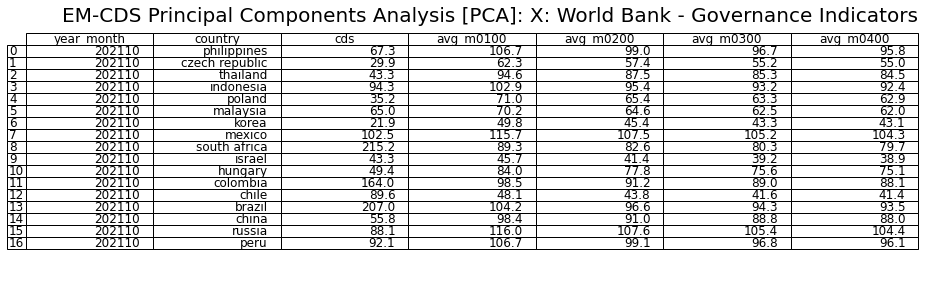

In [29]:
ms = pd.DataFrame(summary)
ms["avg_m0100"]=ms["avg_m0100"].round(1)
ms["avg_m0200"]=ms["avg_m0200"].round(1)
ms["avg_m0300"]=ms["avg_m0300"].round(1)
ms["avg_m0400"]=ms["avg_m0400"].round(1)


ms=ms[["year_month","country","cds","avg_m0100","avg_m0200","avg_m0300","avg_m0400"]]
max_date=ms['year_month'].max()
print(max_date)
ms=ms[ms.year_month == max_date ]
#PART 1 SUMARRY  

final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\pca\\report\\")
final_location_last = '.pdf'

#file location
today = str(date.today())+"_"
#title_graph="EM CDS - Rating Fit Model "
label="EM-CDS Principal Components Analysis [PCA]: X: World Bank - Governance Indicators"

# set fig size
fig, ax = plt.subplots(figsize=(16, 5)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
#here 
tab = table(ax, ms, loc='upper right')  
# set font manually
#tab.auto_set_font_size(20)
tab.set_fontsize(12) 
plt.title(label, size=20)
plt.xlabel("TODAY DATE TIME", size=20)
# save the result
#plt.savefig(location)
#plt.savefig("001_summary_economic.pdf")
#plt.savefig(final_location_first+ "001_summary_Rating" +final_location_last )
plt.savefig(final_location_first+ "001_table" +final_location_last )
plt.show()

# table summary governance indicators

2019


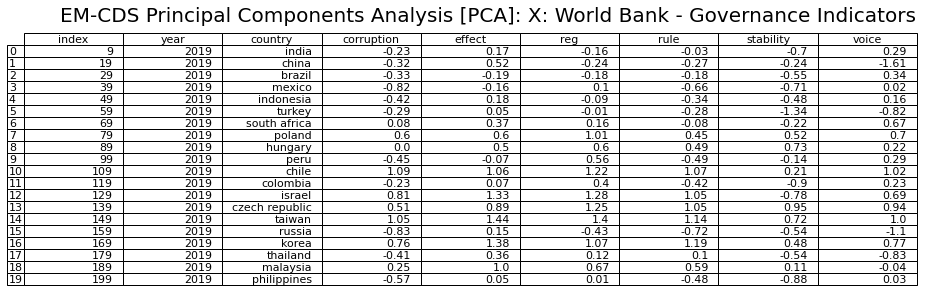

In [30]:
###governance indicators
ms = pd.DataFrame(gov)
ms["voice"]=ms["voice"].round(2)
ms["stability"]=ms["stability"].round(2)
ms["rule"]=ms["rule"].round(2)
ms["effect"]=ms["effect"].round(2)
ms["reg"]=ms["reg"].round(2)
ms["corruption"]=ms["corruption"].round(2)

#features = ['corruption','effect','reg','rule','stability','voice']+
#       ,"corruption","effect","reg","'rule","stability","voice"]]
final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\pca\\report\\")
final_location_last = '.pdf'

max_year=ms['year'].max()
print(max_year)
ms=ms[ms.year == max_year]
#PART 1 SUMARRY  
ms = ms.reset_index()

#file location
today = str(date.today())+"_"
#title_graph="EM CDS - Rating Fit Model "
label="EM-CDS Principal Components Analysis [PCA]: X: World Bank - Governance Indicators"

# set fig size
fig, ax = plt.subplots(figsize=(16, 5)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, ms, loc='upper right')  
# set font manually
#tab.auto_set_font_size(20)
tab.set_fontsize(12) 
plt.title(label, size=20)
plt.xlabel("TODAY DATE TIME", size=20)
# save the result
#plt.savefig(location)
#plt.savefig("001_summary_economic.pdf")
plt.savefig(final_location_first+"001_governance"+final_location_last )
plt.show()

In [31]:


#m0130
#model 1 poli | all counntries|  cds latest | rating + outlook*1 x2x3x4 
########update!--------------
name='modelA0001_m0130'
methodology="Metd: Pol"
########---------------------
#variable_text='latest CDS market value'
#filter_text ="No filter"
#expectation_text="F.Expect"
#name_text=str("[ "+name+" ]")
#title="EM-CDS Principal Components Analysis [PCA]: X: World Bank - Governance Indicators ""
#title_text=(title_graph+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
#location=location_first+today+name+location_last
#r_name="r_"+name


final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\pca\\report_m\\")
final_location_last = '.pdf'

#file location
location_first= ("K:\\2020_2431\\q\\cds_report\\images\\pca\\")
location_last = '_fig.jpg'
residual="Residual"

#print(df1)

parameter_y=15
parameter_x=15
parameter_z=15
parameter_f1=15    
parameter_f2=8   
parameter_t=10

    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3       7          mexico       40
4       3       indonesia       50
5      16            peru       60
6      12           chile       70
7      15          russia       80
8       0     philippines       90
9       5        malaysia      100
10     14           china      110
11     10         hungary      120
12      9          israel      130
13      2        thailand      140
14      4          poland      150
15      1  czech republic      160
16      6           korea      170
   order order_sort  order_2
0      1        cds        1
1      2      m0101        2
2      3      m0102        3
3      4      m0103        4
4      5      m0104        5
5      6      m0105        6
6      7      m0106        7
7      8      m0107        8
            country Status      Values order_sort  order_3
64     south africa    cds  215.200000        cds 

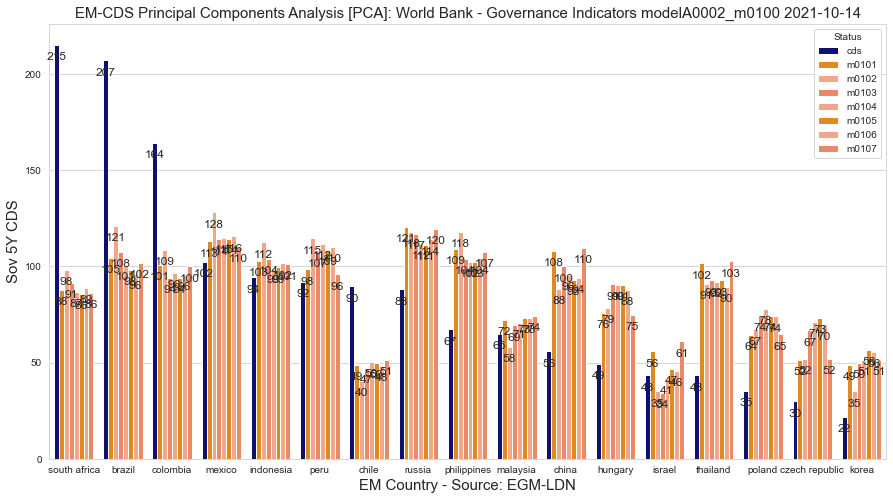

    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3       7          mexico       40
4       3       indonesia       50
5      16            peru       60
6      12           chile       70
7      15          russia       80
8       0     philippines       90
9       5        malaysia      100
10     14           china      110
11     10         hungary      120
12      9          israel      130
13      2        thailand      140
14      4          poland      150
15      1  czech republic      160
16      6           korea      170
   order order_sort  order_2
0      1        cds        1
1      2      m0201        2
2      3      m0202        3
3      4      m0203        4
4      5      m0204        5
5      6      m0205        6
6      7      m0206        7
7      8      m0207        8
            country Status      Values order_sort  order_3
64     south africa    cds  215.200000        cds 

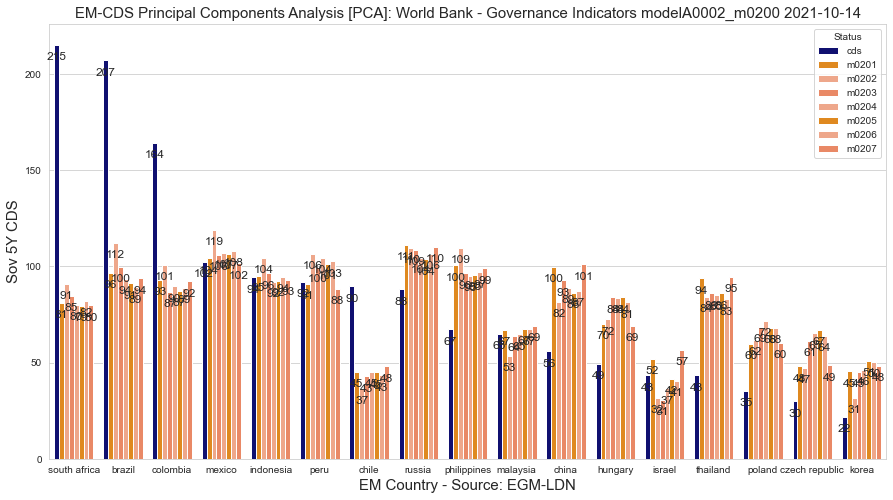

    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3       7          mexico       40
4       3       indonesia       50
5      16            peru       60
6      12           chile       70
7      15          russia       80
8       0     philippines       90
9       5        malaysia      100
10     14           china      110
11     10         hungary      120
12      9          israel      130
13      2        thailand      140
14      4          poland      150
15      1  czech republic      160
16      6           korea      170
   order order_sort  order_2
0      1        cds        1
1      2      m0301        2
2      3      m0302        3
3      4      m0303        4
4      5      m0304        5
5      6      m0305        6
6      7      m0306        7
7      8      m0307        8
            country Status      Values order_sort  order_3
64     south africa    cds  215.200000        cds 

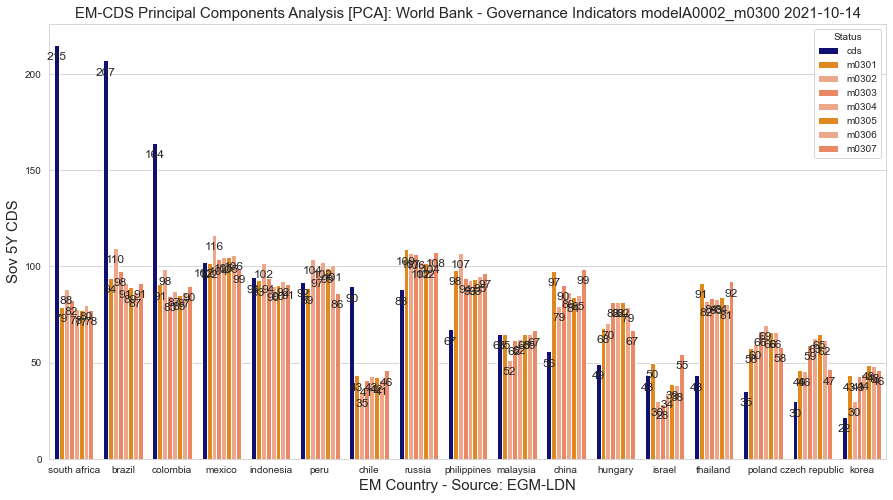

    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3       7          mexico       40
4       3       indonesia       50
5      16            peru       60
6      12           chile       70
7      15          russia       80
8       0     philippines       90
9       5        malaysia      100
10     14           china      110
11     10         hungary      120
12      9          israel      130
13      2        thailand      140
14      4          poland      150
15      1  czech republic      160
16      6           korea      170
   order order_sort  order_2
0      1        cds        1
1      2      m0401        2
2      3      m0402        3
3      4      m0403        4
4      5      m0404        5
5      6      m0405        6
6      7      m0406        7
7      8      m0407        8
            country Status      Values order_sort  order_3
64     south africa    cds  215.200000        cds 

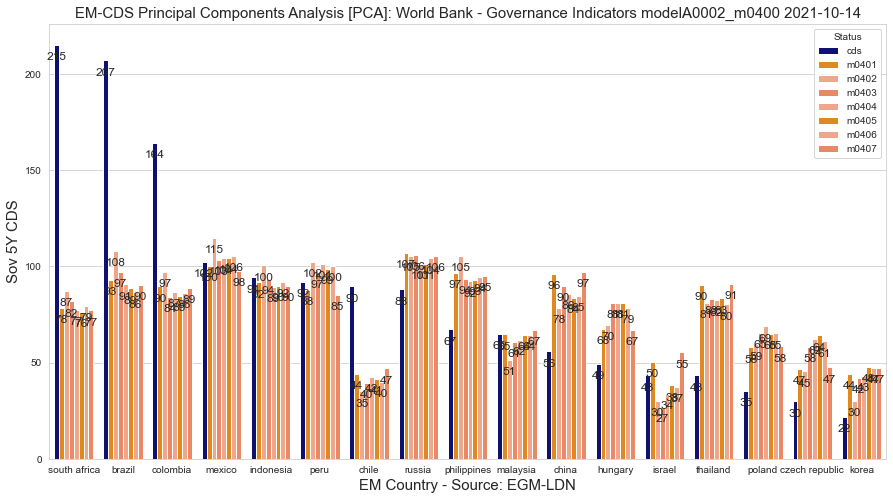

In [32]:
#############
########update!--------------
name='modelA0002_'
########---------------------
variable_text='latest CDS market value'
title="EM-CDS Principal Components Analysis [PCA]: X: World Bank - Governance Indicators "
y_label="Sov 5Y CDS"
x_label="EM Country - Source: EGM-LDN"
z_title="EM-CDS Principal Components Analysis [PCA]: World Bank - Governance Indicators "
end=str(date.today())
lst = ['1','2','3','4']

##lst = ['r_m011','r_m021','r_m031','r_m041','r_m051']


for x in range(len(lst)):      
    series=str(lst[x])   
    model1=str("m0"+series+"01")
    model2=str("m0"+series+"02")
    model3=str("m0"+series+"03")
    model4=str("m0"+series+"04")
    model5=str("m0"+series+"05")
    model6=str("m0"+series+"06")
    model7=str("m0"+series+"07")
    name_series=str("m0"+series+"00")
    name_text=name + name_series
    z_title1=z_title+name_text+" "+end
    location=location_first+name_series+location_last
    
    
    graph_input=f[['country','cds',str(model1),str(model2),str(model3),str(model4),str(model5),str(model6),str(model7)]]
    chart=graph_input
    order_t=chart[['country','cds']]
    order_t = order_t.sort_values(['cds'], ascending=[False])
    order_t = order_t.reset_index()
    order_t = order_t.rename(columns={"index":"order"})
    order_t['order_1'] = (order_t.index + 1)*10
    del order_t['cds']
    print(order_t)
    o_list=chart.columns 
    o_list = pd.DataFrame(o_list)
    o_list.columns=["order_sort"]
    o_list.drop(o_list.index[:1], inplace=True)
    o_list = o_list.reset_index()
    o_list = o_list.rename(columns={"index":"order"})
    o_list['order_2'] = (o_list.index + 1)
    print(o_list)
 

    chart.set_index('country', inplace=True)
    df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
    df1 = df1.reset_index()
    df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
    df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
    df1['order_3']=(df1['order_1']*df1['order_2'])
    df1 = df1.sort_values(['order_3'], ascending=[True])
    del df1['order_1']
    del df1['order_2']
    #be careful
    df1['Values']=(df1['Values']*1)
    print(df1)

    #graph specifics
    #large and height
    plt.figure(figsize=(parameter_f1,parameter_f2))
    sns.set_style('whitegrid')
    splot=sns.barplot(x='country', hue="Status", y="Values",
                      palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
    plt.ylabel(y_label, size=parameter_y)
    plt.xlabel(x_label, size=parameter_x)
    plt.title(z_title1, size=parameter_z)
    plt.tick_params(labelsize=parameter_t)

    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=12,
                       xytext = (0, -12), 
                       textcoords = 'offset points')
    #plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
    plt.savefig(location)
    plt.show()




# sumarry important variables models

    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3       7          mexico       40
4       3       indonesia       50
5      16            peru       60
6      12           chile       70
7      15          russia       80
8       0     philippines       90
9       5        malaysia      100
10     14           china      110
11     10         hungary      120
12      9          israel      130
13      2        thailand      140
14      4          poland      150
15      1  czech republic      160
16      6           korea      170
   order order_sort  order_2
0      1        cds        1
1      2  max_m0100        2
2      3  min_m0100        3
3      4  avg_m0100        4
           country     Status      Values order_sort  order_3
32    south africa        cds  215.200000        cds       10
33    south africa  max_m0100   98.056726  max_m0100       20
52          brazil        cds  207.0000

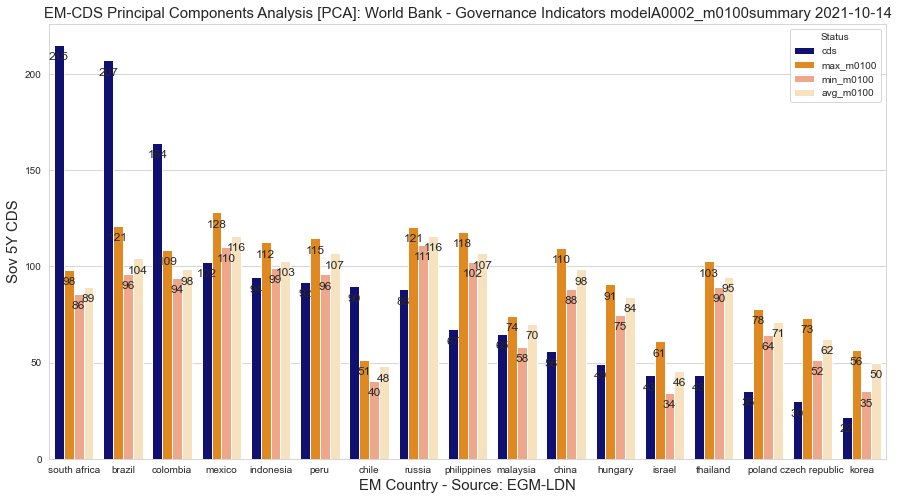

    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3       7          mexico       40
4       3       indonesia       50
5      16            peru       60
6      12           chile       70
7      15          russia       80
8       0     philippines       90
9       5        malaysia      100
10     14           china      110
11     10         hungary      120
12      9          israel      130
13      2        thailand      140
14      4          poland      150
15      1  czech republic      160
16      6           korea      170
   order order_sort  order_2
0      1        cds        1
1      2  max_m0200        2
2      3  min_m0200        3
3      4  avg_m0200        4
           country     Status      Values order_sort  order_3
32    south africa        cds  215.200000        cds       10
33    south africa  max_m0200   90.845118  max_m0200       20
52          brazil        cds  207.0000

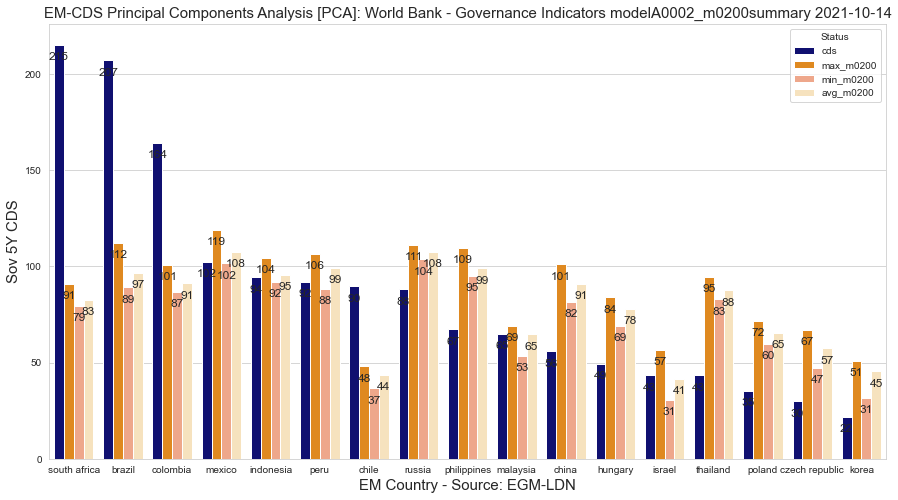

    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3       7          mexico       40
4       3       indonesia       50
5      16            peru       60
6      12           chile       70
7      15          russia       80
8       0     philippines       90
9       5        malaysia      100
10     14           china      110
11     10         hungary      120
12      9          israel      130
13      2        thailand      140
14      4          poland      150
15      1  czech republic      160
16      6           korea      170
   order order_sort  order_2
0      1        cds        1
1      2  max_m0300        2
2      3  min_m0300        3
3      4  avg_m0300        4
           country     Status      Values order_sort  order_3
32    south africa        cds  215.200000        cds       10
33    south africa  max_m0300   88.481190  max_m0300       20
52          brazil        cds  207.0000

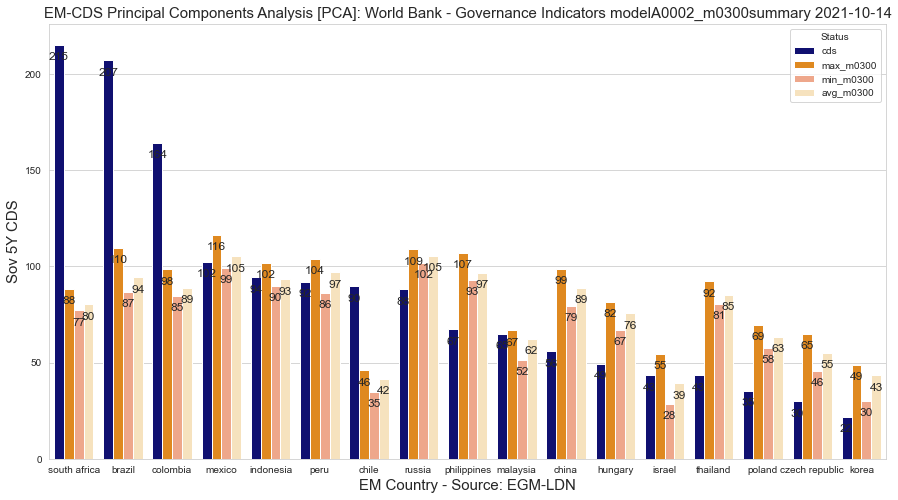

    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3       7          mexico       40
4       3       indonesia       50
5      16            peru       60
6      12           chile       70
7      15          russia       80
8       0     philippines       90
9       5        malaysia      100
10     14           china      110
11     10         hungary      120
12      9          israel      130
13      2        thailand      140
14      4          poland      150
15      1  czech republic      160
16      6           korea      170
   order order_sort  order_2
0      1        cds        1
1      2  max_m0400        2
2      3  min_m0400        3
3      4  avg_m0400        4
           country     Status      Values order_sort  order_3
32    south africa        cds  215.200000        cds       10
33    south africa  max_m0400   87.420654  max_m0400       20
52          brazil        cds  207.0000

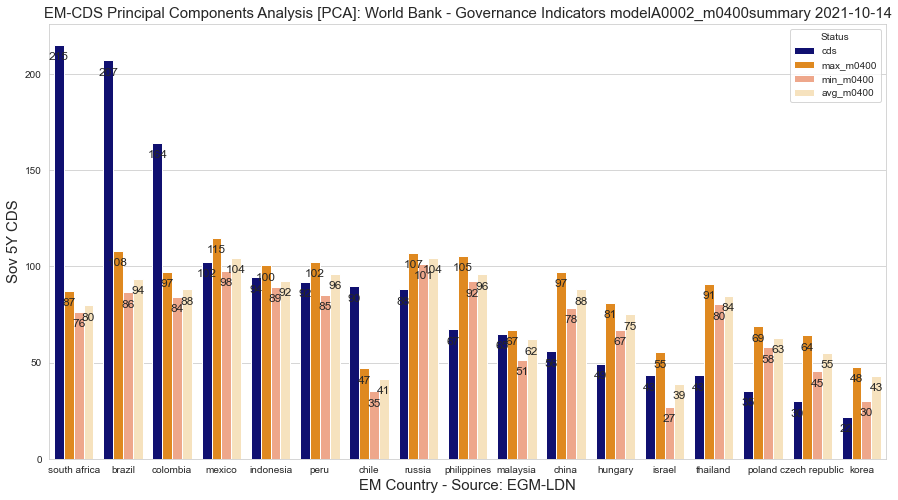

In [33]:
#summary
#'max_m0100','min_m0100','avg_m0100']]


lst = ['1','2','3','4']

####
#lst = ['r_m011','r_m021','r_m031','r_m041','r_m051']


for x in range(len(lst)):      
    series=str(lst[x])   
    model1=str("max_m0"+series+"00")
    model2=str("min_m0"+series+"00")
    model3=str("avg_m0"+series+"00")
    name_series=str("m0"+series+"00"+"summary")
    name_text=name + name_series
    z_title1=z_title+name_text+" "+end
    location=location_first+name_series+location_last
    
    
    graph_input=f[['country','cds',str(model1),str(model2),str(model3)]]
    chart=graph_input
    order_t=chart[['country','cds']]
    order_t = order_t.sort_values(['cds'], ascending=[False])
    order_t = order_t.reset_index()
    order_t = order_t.rename(columns={"index":"order"})
    order_t['order_1'] = (order_t.index + 1)*10
    del order_t['cds']
    print(order_t)
    o_list=chart.columns 
    o_list = pd.DataFrame(o_list)
    o_list.columns=["order_sort"]
    o_list.drop(o_list.index[:1], inplace=True)
    o_list = o_list.reset_index()
    o_list = o_list.rename(columns={"index":"order"})
    o_list['order_2'] = (o_list.index + 1)
    print(o_list)
 

    chart.set_index('country', inplace=True)
    df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
    df1 = df1.reset_index()
    df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
    df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
    df1['order_3']=(df1['order_1']*df1['order_2'])
    df1 = df1.sort_values(['order_3'], ascending=[True])
    del df1['order_1']
    del df1['order_2']
    #be careful
    df1['Values']=(df1['Values']*1)
    print(df1)

    #graph specifics
    #large and height
    plt.figure(figsize=(parameter_f1,parameter_f2))
    sns.set_style('whitegrid')
    splot=sns.barplot(x='country', hue="Status", y="Values",
                      palette=["navy","darkorange","lightsalmon","moccasin","moccasin"], data=df1)
    plt.ylabel(y_label, size=parameter_y)
    plt.xlabel(x_label, size=parameter_x)
    plt.title(z_title1, size=parameter_z)
    plt.tick_params(labelsize=parameter_t)

    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=12,
                       xytext = (0, -12), 
                       textcoords = 'offset points')
    #plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
    plt.savefig(location)
    plt.show()
    
    
    

<ipython-input-34-d64d4bf8a4bf>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_p['average']=order_p[[str(model1),str(model2),str(model3),str(model4),str(model5),str(model6),str(model7)]].mean(axis=1)


    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3      12           chile       40
4       9          israel       50
5       5        malaysia       60
6       3       indonesia       70
7       7          mexico       80
8      16            peru       90
9      15          russia      100
10      6           korea      110
11      1  czech republic      120
12     10         hungary      130
13      4          poland      140
14      0     philippines      150
15     14           china      160
16      2        thailand      170
   index  order order_sort  order_2
0      7      8    average        1
1      6      7    r_m0107        2
2      5      6    r_m0106        3
3      4      5    r_m0105        4
4      3      4    r_m0104        5
5      2      3    r_m0103        6
6      1      2    r_m0102        7
7      0      1    r_m0101        8
          country   Status      Values order_s

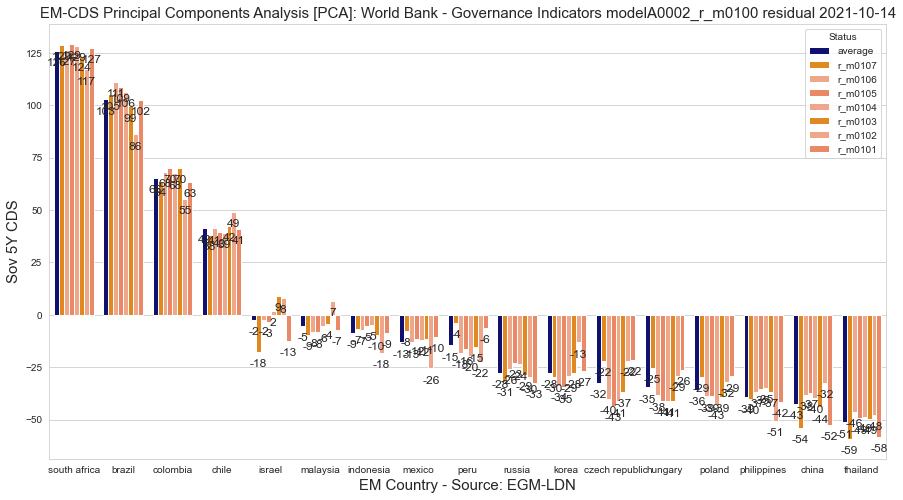

<ipython-input-34-d64d4bf8a4bf>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_p['average']=order_p[[str(model1),str(model2),str(model3),str(model4),str(model5),str(model6),str(model7)]].mean(axis=1)


    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3      12           chile       40
4       9          israel       50
5       5        malaysia       60
6       3       indonesia       70
7       7          mexico       80
8      16            peru       90
9      15          russia      100
10      6           korea      110
11      1  czech republic      120
12     10         hungary      130
13      4          poland      140
14      0     philippines      150
15     14           china      160
16      2        thailand      170
   index  order order_sort  order_2
0      7      8    average        1
1      6      7    r_m0207        2
2      5      6    r_m0206        3
3      4      5    r_m0205        4
4      3      4    r_m0204        5
5      2      3    r_m0203        6
6      1      2    r_m0202        7
7      0      1    r_m0201        8
          country   Status      Values order_s

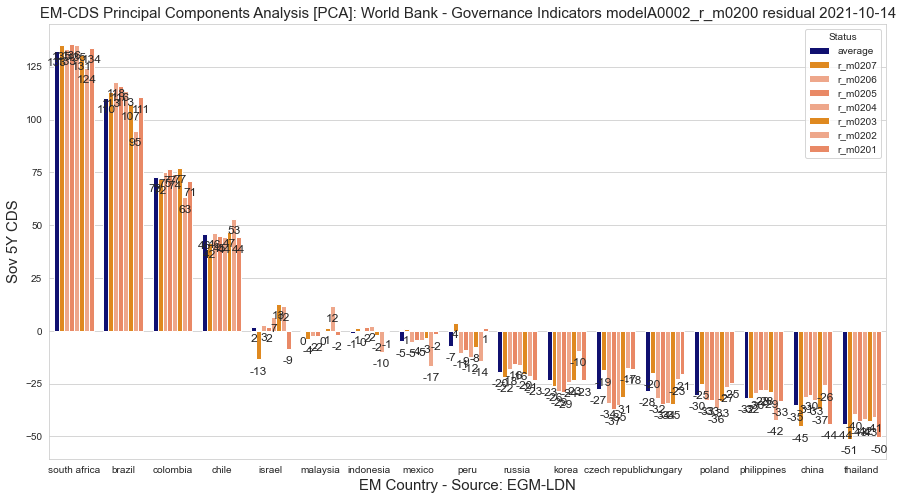

<ipython-input-34-d64d4bf8a4bf>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_p['average']=order_p[[str(model1),str(model2),str(model3),str(model4),str(model5),str(model6),str(model7)]].mean(axis=1)


    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3      12           chile       40
4       9          israel       50
5       5        malaysia       60
6       3       indonesia       70
7       7          mexico       80
8      16            peru       90
9      15          russia      100
10      6           korea      110
11      1  czech republic      120
12     10         hungary      130
13      4          poland      140
14      0     philippines      150
15     14           china      160
16      2        thailand      170
   index  order order_sort  order_2
0      7      8    average        1
1      6      7    r_m0307        2
2      5      6    r_m0306        3
3      4      5    r_m0305        4
4      3      4    r_m0304        5
5      2      3    r_m0303        6
6      1      2    r_m0302        7
7      0      1    r_m0301        8
          country   Status      Values order_s

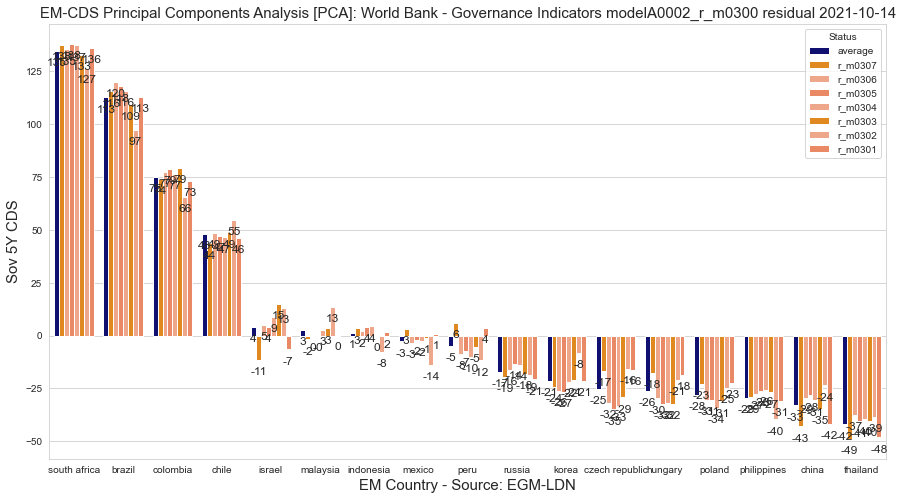

<ipython-input-34-d64d4bf8a4bf>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_p['average']=order_p[[str(model1),str(model2),str(model3),str(model4),str(model5),str(model6),str(model7)]].mean(axis=1)


    order         country  order_1
0       8    south africa       10
1      13          brazil       20
2      11        colombia       30
3      12           chile       40
4       9          israel       50
5       5        malaysia       60
6       3       indonesia       70
7       7          mexico       80
8      16            peru       90
9      15          russia      100
10      6           korea      110
11      1  czech republic      120
12     10         hungary      130
13      4          poland      140
14      0     philippines      150
15     14           china      160
16      2        thailand      170
   index  order order_sort  order_2
0      7      8    average        1
1      6      7    r_m0407        2
2      5      6    r_m0406        3
3      4      5    r_m0405        4
4      3      4    r_m0404        5
5      2      3    r_m0403        6
6      1      2    r_m0402        7
7      0      1    r_m0401        8
          country   Status      Values order_s

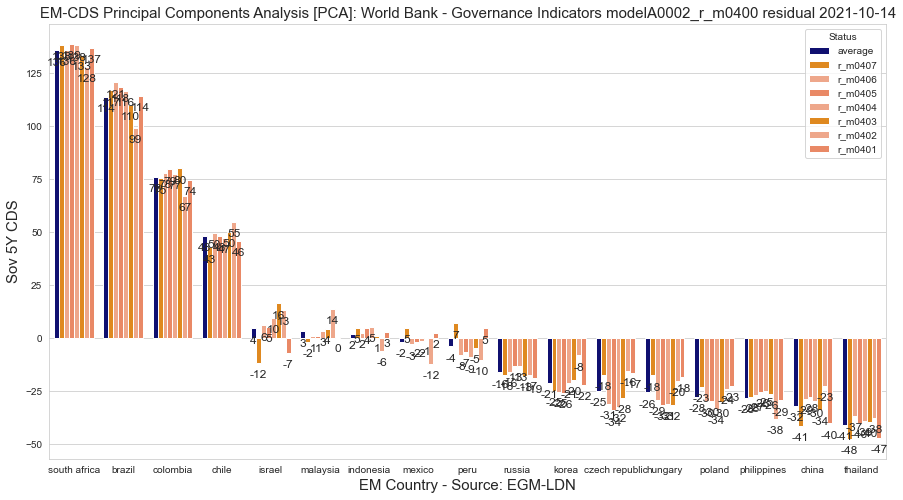

In [34]:
object_plot=f[['country','r_m0101','r_m0102','r_m0103','r_m0104','r_m0105','r_m0106','r_m0107']]

#############
########update!--------------
name='modelA0002_'
########---------------------
variable_text='latest CDS market value'
title="EM-CDS Principal Components Analysis [PCA]: X: World Bank - Governance Indicators "
y_label="Sov 5Y CDS"
x_label="EM Country - Source: EGM-LDN"
z_title="EM-CDS Principal Components Analysis [PCA]: World Bank - Governance Indicators "

lst = ['1','2','3','4']

####
#lst = ['r_m011','r_m021','r_m031','r_m041','r_m051']


for x in range(len(lst)):      
    series=str(lst[x])   
    model1=str("r_m0"+series+"01")
    model2=str("r_m0"+series+"02")
    model3=str("r_m0"+series+"03")
    model4=str("r_m0"+series+"04")
    model5=str("r_m0"+series+"05")
    model6=str("r_m0"+series+"06")
    model7=str("r_m0"+series+"07")
    name_series=str("r_m0"+series+"00"+" residual")
    name_text=name + name_series
    z_title1=z_title+name_text+" "+end
    location=location_first+name_series+location_last
    
    
    chart=f[['country',str(model1),str(model2),str(model3),str(model4),str(model5),str(model6),str(model7)]]
    order_p=chart
    order_p['average']=order_p[[str(model1),str(model2),str(model3),str(model4),str(model5),str(model6),str(model7)]].mean(axis=1)
    order_t=order_p[['country','average']]
    order_t = order_t.sort_values(['average'], ascending=[False])
    order_t = order_t.reset_index()
    order_t = order_t.rename(columns={"index":"order"})
    order_t['order_1'] = (order_t.index + 1)*10
    del order_t['average']
    print(order_t)
    o_list=chart.columns 
    o_list = pd.DataFrame(o_list)
    o_list.columns=["order_sort"]
    o_list.drop(o_list.index[:1], inplace=True)
    o_list = o_list.reset_index()
    o_list = o_list.rename(columns={"index":"order"})
    o_list['order_2'] = (o_list.index + 1)
    o_list = o_list.sort_values(['order_2'], ascending=[False])
    o_list = o_list.reset_index()
    o_list['order_2'] = (o_list.index + 1)

    print(o_list)
    


    chart.set_index('country', inplace=True)
    df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
    df1 = df1.reset_index()
    df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
    df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
    df1['order_3']=(df1['order_1']*df1['order_2'])
    df1 = df1.sort_values(['order_3'], ascending=[True])
    del df1['order_1']
    del df1['order_2']
    #be careful
    df1['Values']=(df1['Values']*1)
    print(df1)

    #graph specifics
    #large and height
    plt.figure(figsize=(parameter_f1,parameter_f2))
    sns.set_style('whitegrid')
    splot=sns.barplot(x='country', hue="Status", y="Values",
                      palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
    plt.ylabel(y_label, size=parameter_y)
    plt.xlabel(x_label, size=parameter_x)
    plt.title(z_title1, size=parameter_z)
    plt.tick_params(labelsize=parameter_t)

    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=12,
                       xytext = (0, -12), 
                       textcoords = 'offset points')
    #plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
    plt.savefig(location)
    plt.show()

In [35]:
#https://www.kaggle.com/asimislam/python-colors-color-cmap-palette
#lightsalmon
#yellow
#moccasin
#lightyellow
#khaki
#charts comaprings cds vs model set x4
#chart comapriong and soring the residula x4
#chartes comparing the CDS vs vs the average, median max min
#chart comapriong and soring the residula  vs the average, median max min x4 

In [36]:

os.chdir('K:/2020_2431/q/cds_report/images/pca')
#K:\2020_2431\q\cds_report\images\pca
print(os.getcwd())

final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\\pca\\report\\")
final_location_last = '.pdf'

lst = ['1','2','3','4']

####
#lst = ['r_m011','r_m021','r_m031','r_m041','r_m051']
#deleter the summary page
# list_im = [str("m0"+series+"00_fig.jpg"), str("m0"+series+"00summary_fig.jpg"),str("r_m0"+series+"00residual_fig.jpg")]

#m0100_fig
#m0100summary_fig
#r_m0100residual_fig

for x in range(len(lst)): 
    series=str(lst[x]) 
    print(series)
    list_im = [str("m0"+series+"00_fig.jpg"), str("r_m0"+series+"00residual_fig.jpg")]
    imgs    = [ PIL.Image.open(i) for i in list_im ]
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

    # for a vertical stacking it is simple: use vstack
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    location=final_location_first+str("m0"+series+"00_fig_complete")+final_location_last
    imgs_comb.save(location)
    print(location)
    #imgs_comb.save( str(final_location_first+"002_technical"+final_location_last) ) 



K:\2020_2431\q\cds_report\images\pca
1


<ipython-input-36-efd9d6d165d1>:26: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-36-efd9d6d165d1>:29: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )


K:\2020_2431\q\cds_report\images\\pca\report\m0100_fig_complete.pdf
2
K:\2020_2431\q\cds_report\images\\pca\report\m0200_fig_complete.pdf
3
K:\2020_2431\q\cds_report\images\\pca\report\m0300_fig_complete.pdf
4
K:\2020_2431\q\cds_report\images\\pca\report\m0400_fig_complete.pdf


# merge all pdfs

In [37]:
source_dir = 'K:/2020_2431/q/cds_report/images/pca/report/'
source_dir2 = 'K:/2020_2431/q/cds_report/images/pca/report_f/'
merger = PdfFileMerger()

for item in os.listdir(source_dir):
    if item.endswith('pdf'):
        #print(item)
        merger.append(source_dir + item)

merger.write(source_dir2 + 'EMCDS_0002_PCA_Complete.pdf')       
merger.close()


In [38]:
#print(summary)
print(summary.columns)

Index(['year_month', 'year', 'country', 'datetime', 'cds', 'month', 'y_adj',
       'year_adj', 'pc_1', 'pc_1+2',
       ...
       'r_min_m0300', 'r_min_m0400', 'r_avg_m0100', 'r_avg_m0200',
       'r_avg_m0300', 'r_avg_m0400', 'r_med_m0100', 'r_med_m0200',
       'r_med_m0300', 'r_med_m0400'],
      dtype='object', length=103)


In [39]:
######save output
output = summary[['country','cds','avg_m0100','avg_m0200','avg_m0300','avg_m0400']]
print(output)
output=output.reset_index(drop=True)
#max_date=output004['time'].max()
#print(max_date)
#output004=output004[output004.time == max_date ]
#'avg_m0200','avg_m0300','avg_m0400'
output['model002_m0100']=output[['avg_m0100','avg_m0200','avg_m0300','avg_m0400']].mean(axis=1)
output['model002_m0100']=output['model002_m0100'].round(1)
output=output[['country','cds','model002_m0100']]
#output=output[['country','cds','model002_m0100']]
print(output)
output002=output
output002.to_csv (r'K:\2020_2431\q\cds_report\output\output002.csv', index = False, header=True)


           country    cds  avg_m0100  avg_m0200  avg_m0300  avg_m0400
0      philippines   67.3      106.7       99.0       96.7       95.8
1   czech republic   29.9       62.3       57.4       55.2       55.0
2         thailand   43.3       94.6       87.5       85.3       84.5
3        indonesia   94.3      102.9       95.4       93.2       92.4
4           poland   35.2       71.0       65.4       63.3       62.9
5         malaysia   65.0       70.2       64.6       62.5       62.0
6            korea   21.9       49.8       45.4       43.3       43.1
7           mexico  102.5      115.7      107.5      105.2      104.3
8     south africa  215.2       89.3       82.6       80.3       79.7
9           israel   43.3       45.7       41.4       39.2       38.9
10         hungary   49.4       84.0       77.8       75.6       75.1
11        colombia  164.0       98.5       91.2       89.0       88.1
12           chile   89.6       48.1       43.8       41.6       41.4
13          brazil  

In [40]:





timeclock.stop()
#Elapsed time: 100.7088 seconds
#Elapsed time: 89.5429 seconds

Elapsed time: 94.4670 seconds


94.466999

In [41]:
print("Compelte end")

Compelte end
